In [33]:
from salad.serialize import read
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [142]:
d = []
for p in list(Path("../search/single_search").rglob("regular/deduplicated_summary.pkl")):
    d.append(read(p))
    print(p, len(d[-1]))

../search/single_search/DEEP/20190403/A0c/detector_1/snr_5.0/regular/deduplicated_summary.pkl 13
../search/single_search/DEEP/20190403/A0c/detector_1/snr_4.5/regular/deduplicated_summary.pkl 13
../search/single_search/DEEP/20190403/A0c/detector_1/snr_4.0/regular/deduplicated_summary.pkl 14
../search/single_search/DEEP/20190403/A0c/detector_1/snr_3.5/regular/deduplicated_summary.pkl 18
../search/single_search/DEEP/20190403/A0c/detector_1/snr_3.0/regular/deduplicated_summary.pkl 21


In [145]:
d = []
for p in list(Path("../search/single_search").rglob("regular/filtered_summary.pkl")):
    d.append(read(p))
    print(p, len(d[-1]))

../search/single_search/DEEP/20190403/A0c/detector_1/snr_5.0/regular/filtered_summary.pkl 13
../search/single_search/DEEP/20190403/A0c/detector_1/snr_4.5/regular/filtered_summary.pkl 13
../search/single_search/DEEP/20190403/A0c/detector_1/snr_4.0/regular/filtered_summary.pkl 14
../search/single_search/DEEP/20190403/A0c/detector_1/snr_3.5/regular/filtered_summary.pkl 18
../search/single_search/DEEP/20190403/A0c/detector_1/snr_3.0/regular/filtered_summary.pkl 21


In [171]:
import matplotlib as mpl

def plot_summary_coadds(s):
    fig = plt.figure(dpi=150)
    axs = fig.subplots(1, 5)
    plt.sca(axs[0])
    plt.imshow(s['coadd']['mean'], cmap='gray_r')
    plt.title("mean")
    plt.xticks([])
    plt.yticks([])

    plt.sca(axs[1])
    plt.imshow(s['coadd']['sum'], cmap='gray_r')
    plt.title("sum")
    plt.xticks([])
    plt.yticks([])

    plt.sca(axs[2])
    plt.imshow(s['coadd']['median'], cmap='gray_r')
    plt.title("median")
    plt.xticks([])
    plt.yticks([])

    plt.sca(axs[3])
    plt.imshow(s['coadd']['weighted'], cmap='gray_r')
    plt.title("weighted")
    plt.xticks([])
    plt.yticks([])
    
    plt.sca(axs[4])

#     cmap = plt.cm.Set1  # define the colormap
#     # extract all colors from the .jet map
#     _cmaplist = [cmap(i) for i in range(cmap.N)]
#     alpha = 0.2
#     cmaplist = []
#     for c in _cmaplist:
#         cmaplist.append(c[:3] + (alpha,))
# #     force the first color entry to be white
# #     cmaplist[0] = (1, 1, 1, 1.0)

#     # create the new map
#     cmap = mpl.colors.LinearSegmentedColormap.from_list(
#         'Custom cmap', cmaplist, cmap.N
#     ) 
    
#     m = np.bitwise_or.reduce(s['mask'], axis=0)
#     plane = s['mask_plane_dict'][0]
#     for i, mask in enumerate(plane):
#         plt.imshow(((m >> plane[mask]) & 1)*i, cmap=cmap, alpha=0.2)
    plt.imshow(np.bitwise_or.reduce(s['mask'], axis=0))
    plt.title("mask")
    plt.xticks([])
    plt.yticks([])

    return fig

def plot_coadd_masks(s, masks=["BAD", "CR", "SUSPECT", "SAT", "FAKE"]):
    plane = s['mask_plane_dict'][0]
    
    masks = list(plane.keys())
    fig = plt.figure(dpi=150)
    w = int(len(masks)**0.5)
    h = int(len(masks)/w)
    axs = np.atleast_1d(fig.subplots(w, h)).ravel()
    m = np.bitwise_or.reduce(s['mask'])

        
    cmap = plt.cm.Set1  # define the colormap
    # extract all colors from the .jet map
    _cmaplist = [cmap(i) for i in range(cmap.N)]
    alpha = 0.2
    cmaplist = []
    for c in _cmaplist:
        cmaplist.append(c[:3] + (alpha,))

    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N
    ) 
    
    m = np.bitwise_or.reduce(s['mask'], axis=0)
    plane = s['mask_plane_dict'][0]
#     for i, mask in enumerate(plane):
#         plt.imshow(((m >> plane[mask]) & 1)*i, cmap=cmap)
    
    for i, mask in enumerate(masks):
        plt.sca(axs[i])
        plt.imshow(((m >> plane[mask]) & 1)*i, alpha=1)
        plt.title(mask)
        plt.xticks([])
        plt.yticks([])

    return fig
    
    
def plot_summary_light_curve(s):
    fig = plt.figure(dpi=150)
    axs = fig.subplots(3, 1, sharex=True)
    plt.sca(axs[0])
    plt.errorbar(
        np.arange(len(s['light_curve']['flux'])), 
        s['light_curve']['flux'], 
        yerr=s['light_curve']['sigma'],
        fmt='o',
    #     c=s['light_curve']['mask'],
        ms=2,
        lw=1,
    )
    plt.title("Flux (zp=31)")
    plt.sca(axs[1])
    plt.scatter(
        np.arange(len(s['light_curve']['flux'])), 
        s['light_curve']['mag'],
        c=s['light_curve']['mask'] != 0,
        s=2
    )
    plt.title("Mag")
    plt.sca(axs[2])
    plt.scatter(
        np.arange(len(s['light_curve']['flux'])), 
        s['light_curve']['snr'],
        c=s['light_curve']['mask'] != 0,
        s=2
    )
    plt.title("SNR")
    return fig



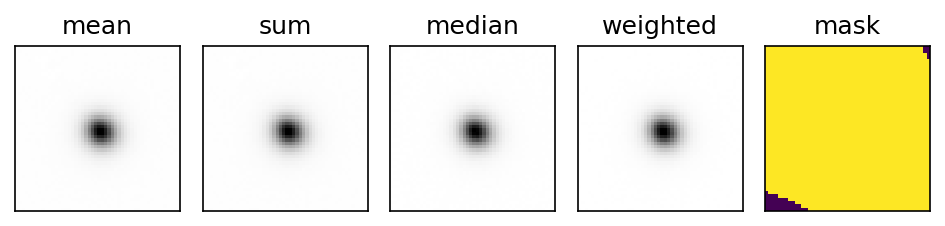

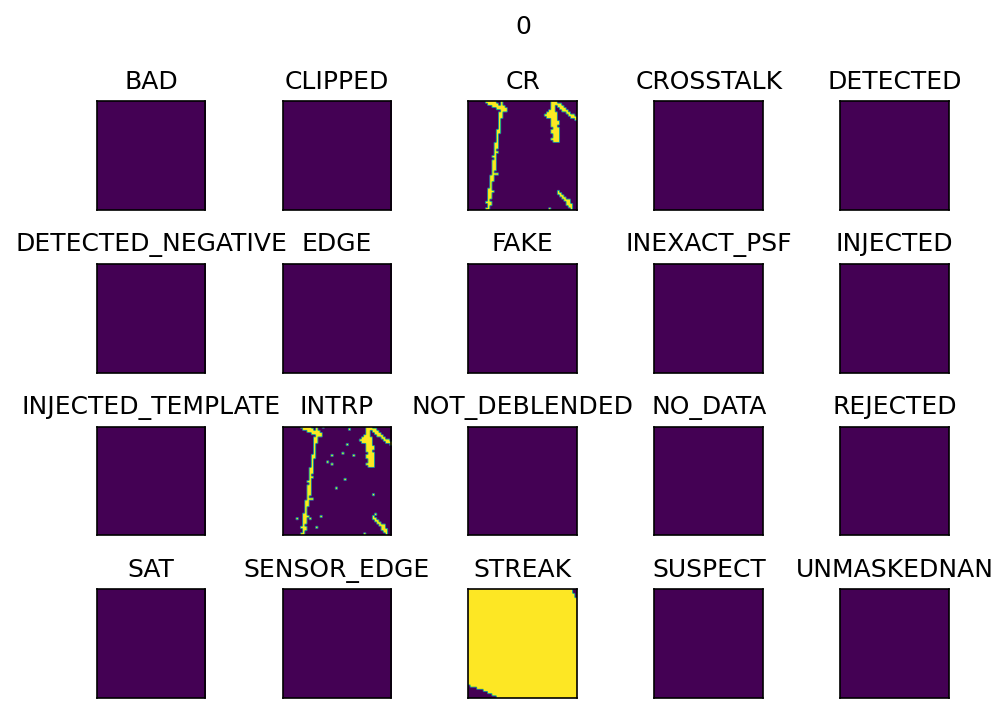

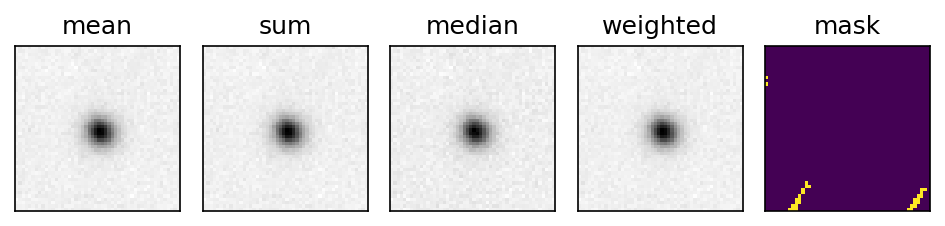

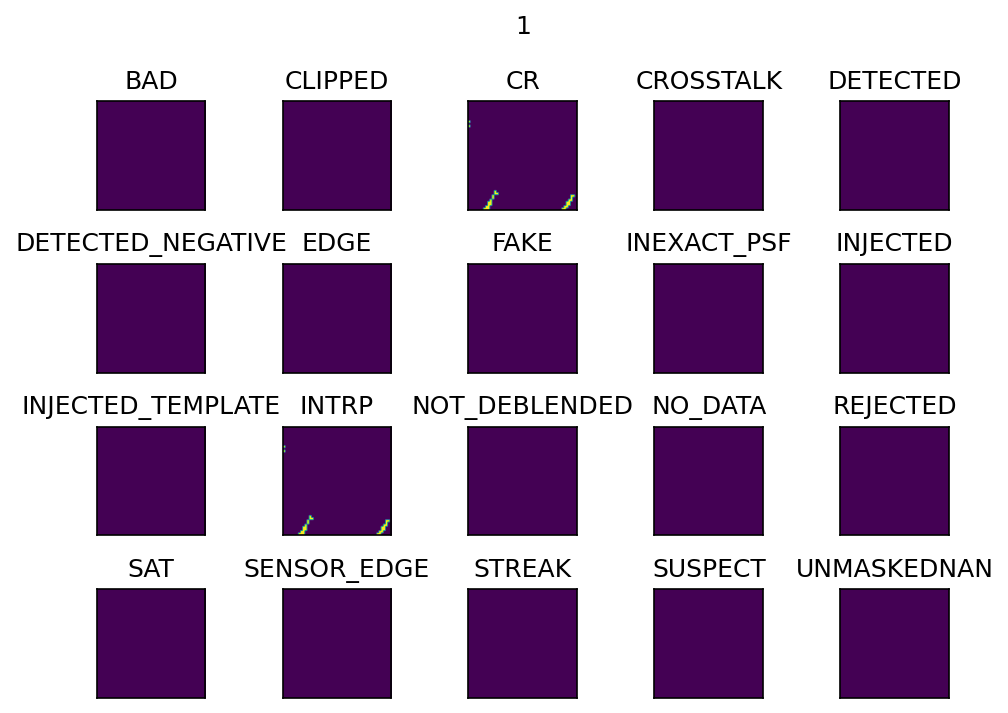

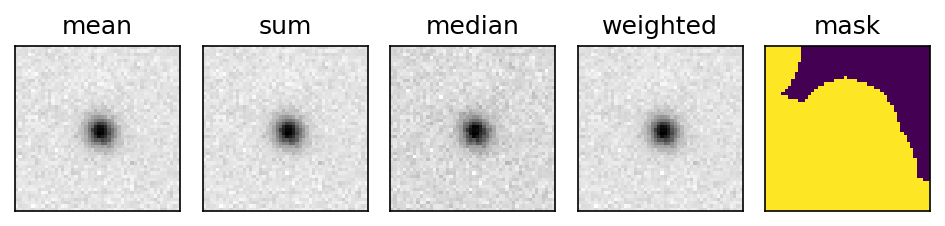

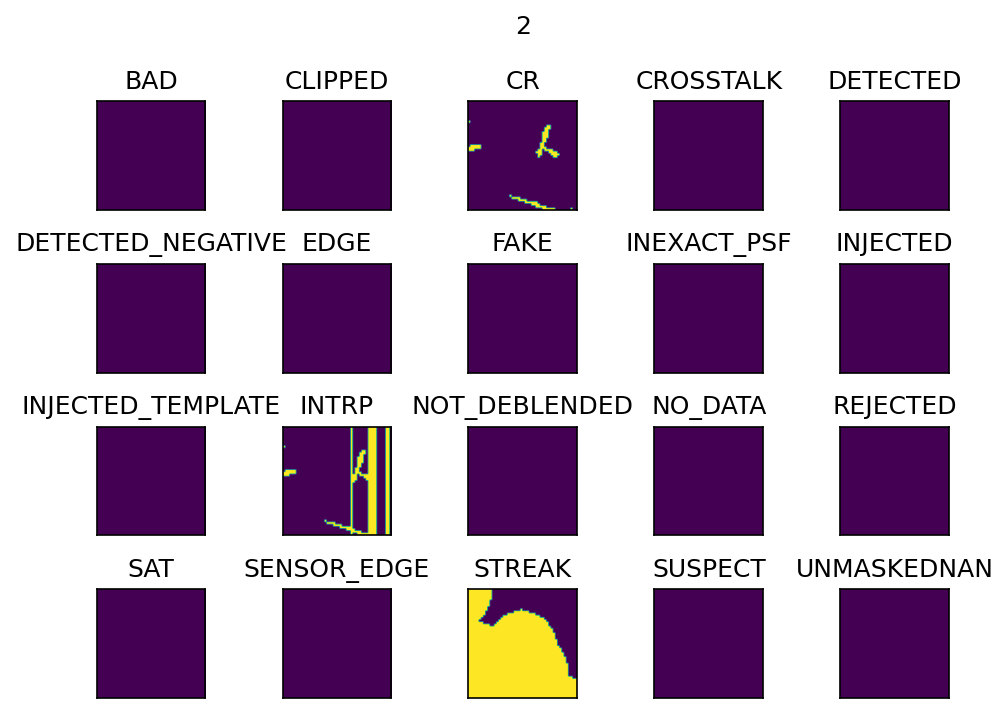

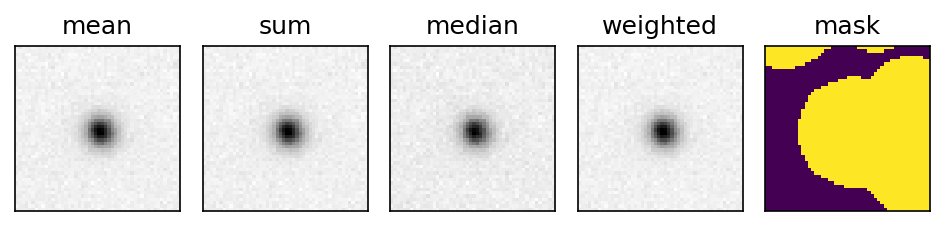

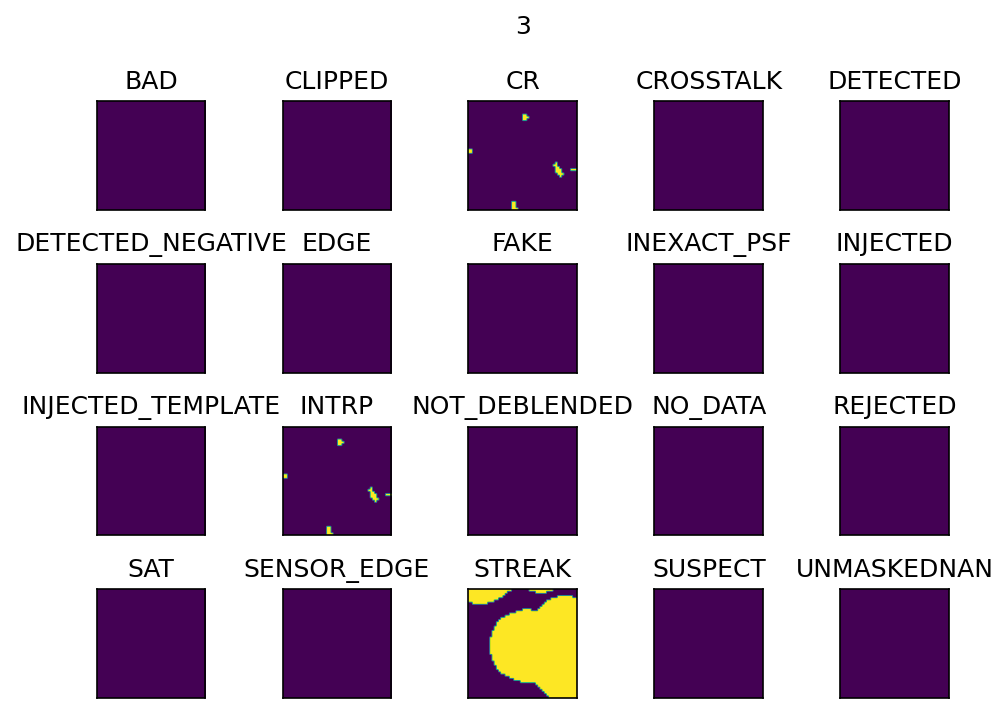

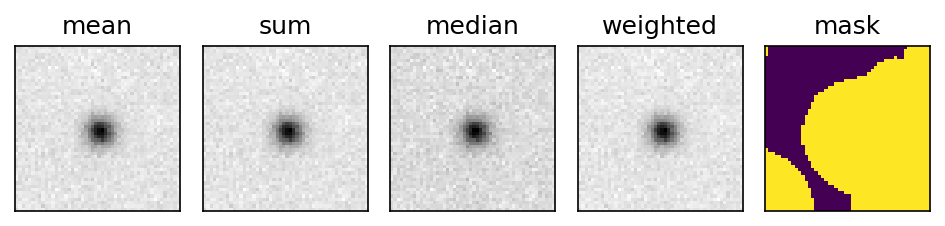

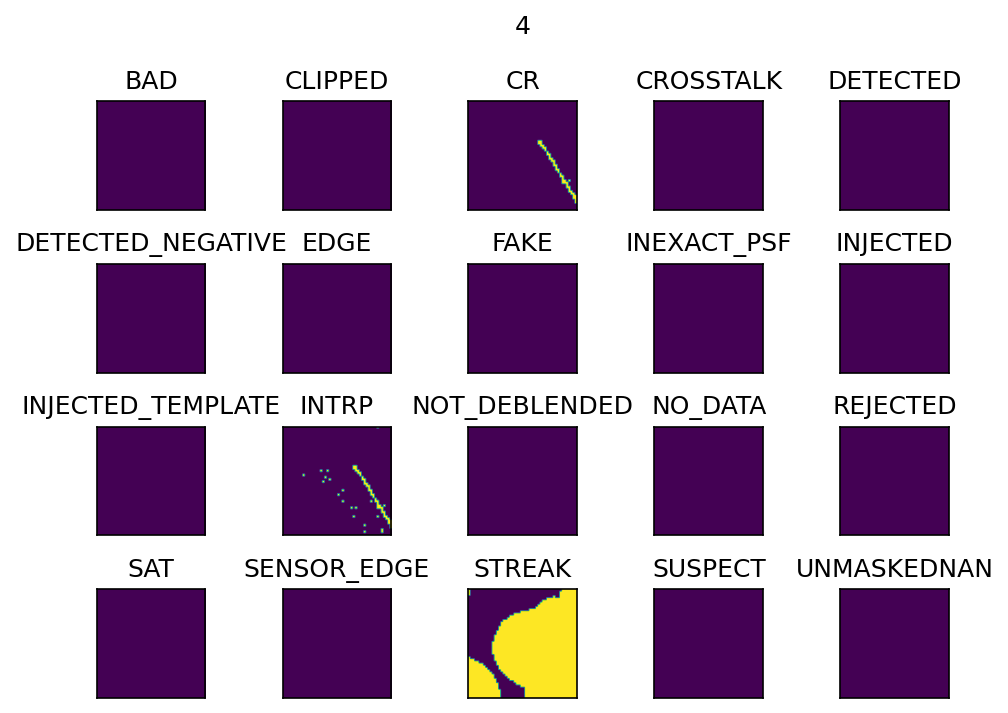

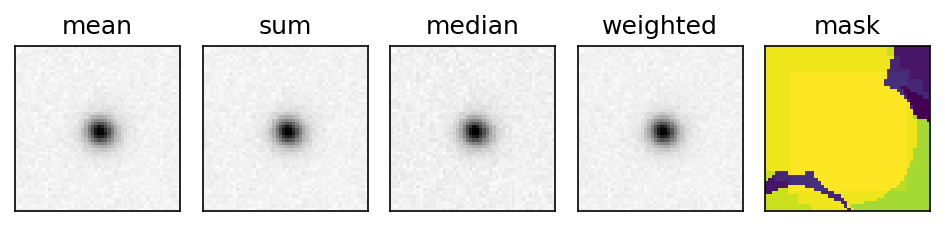

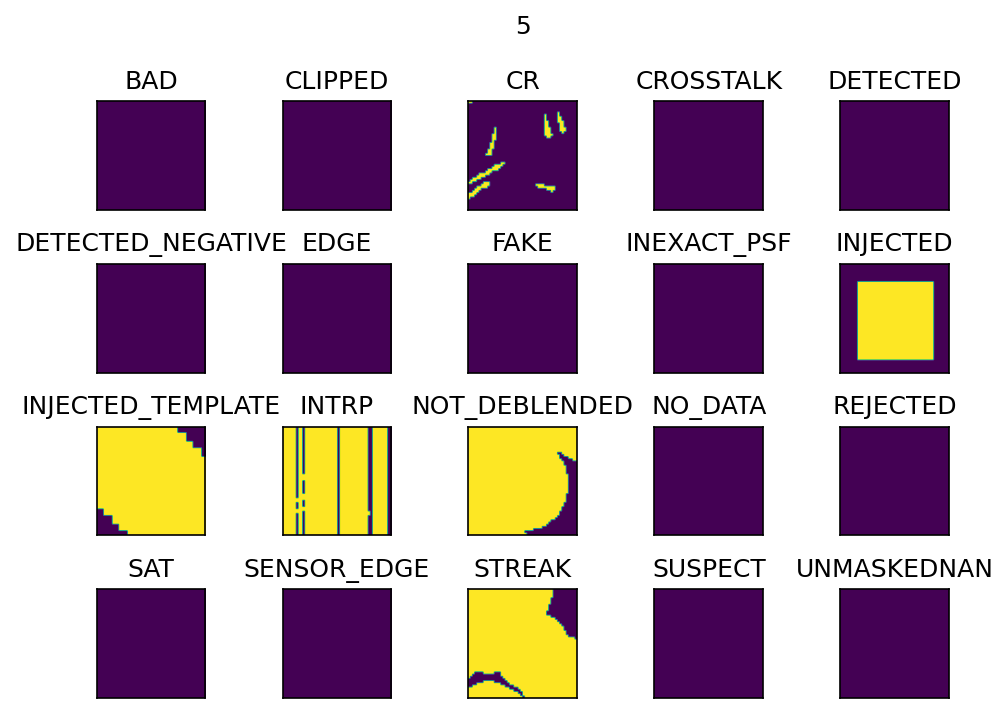

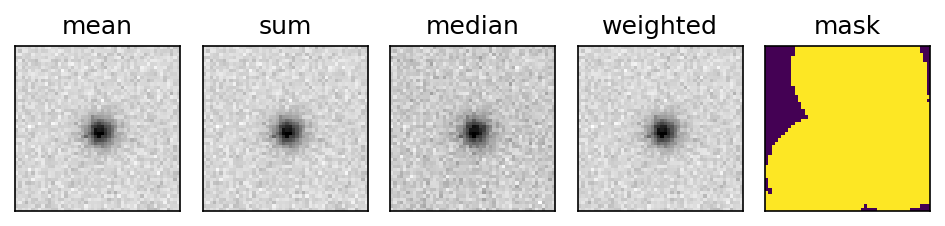

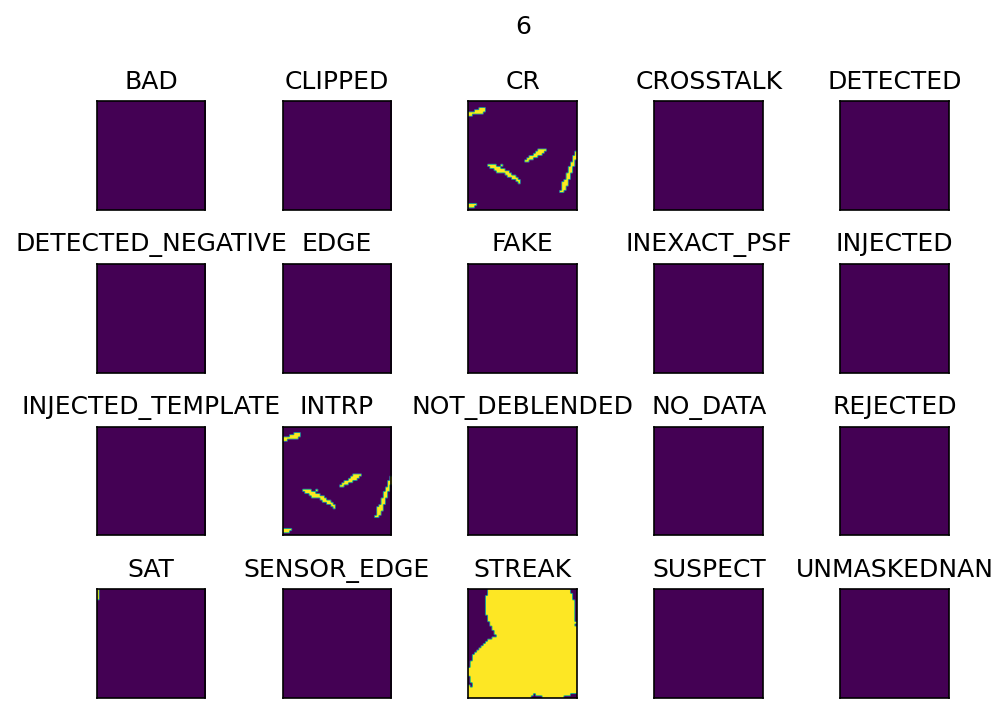

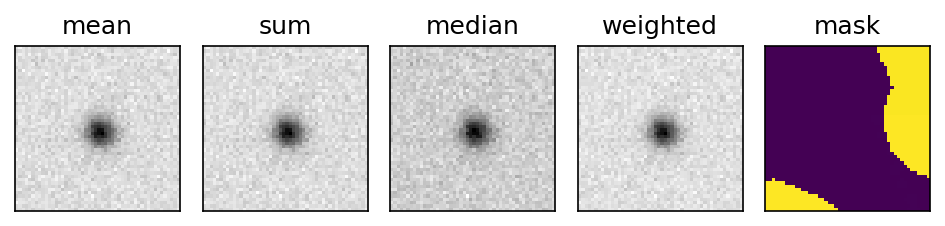

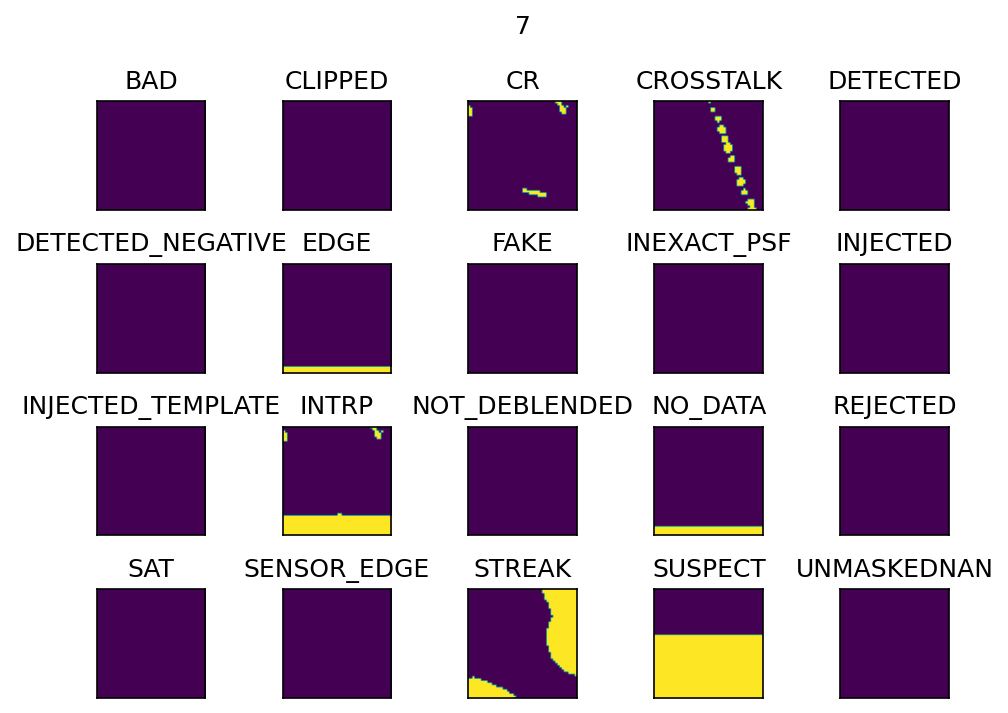

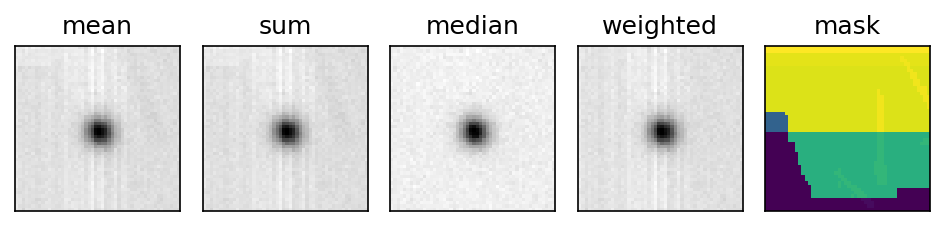

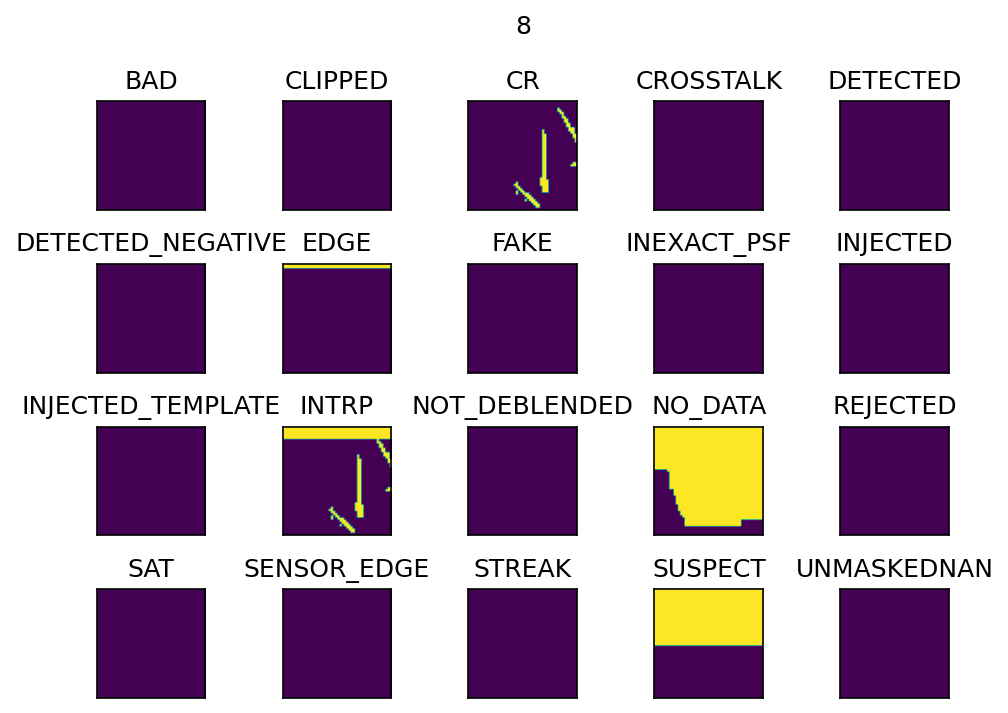

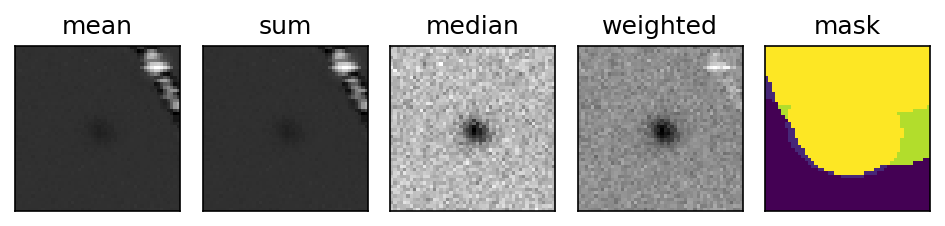

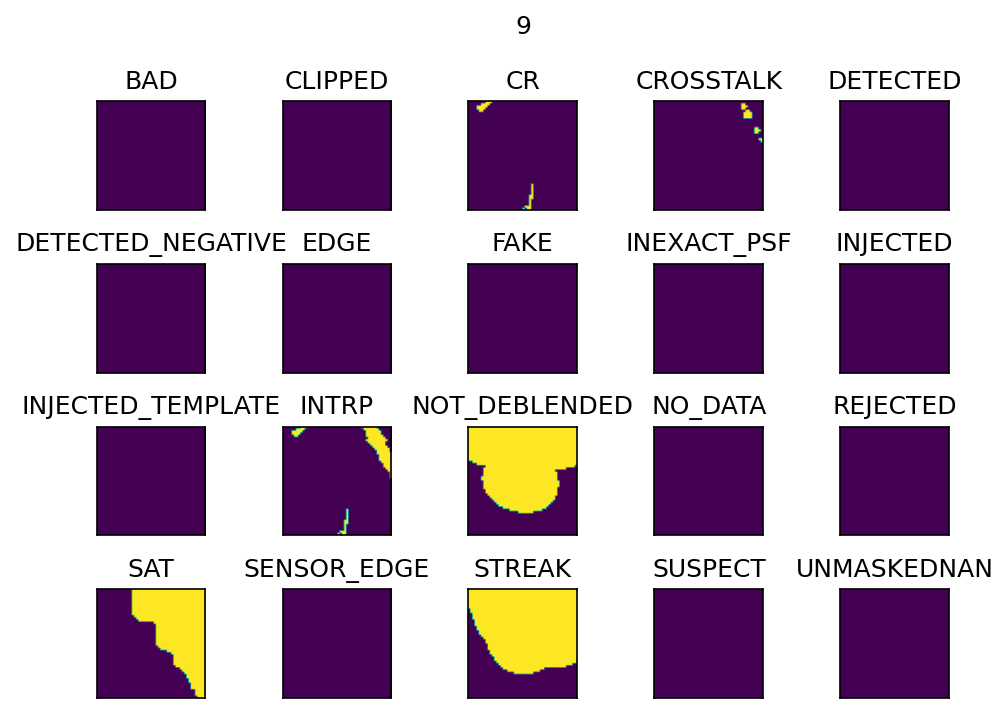

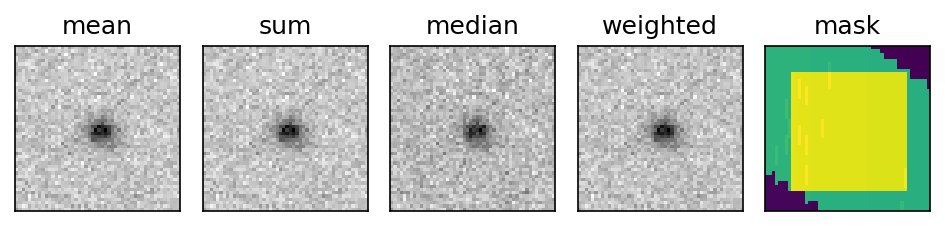

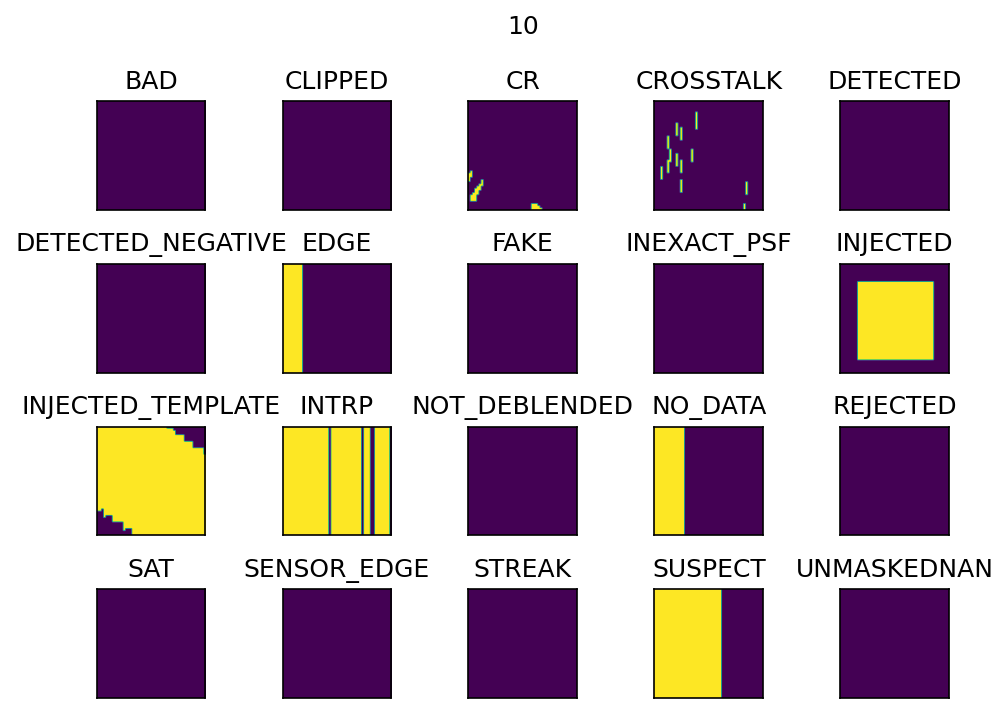

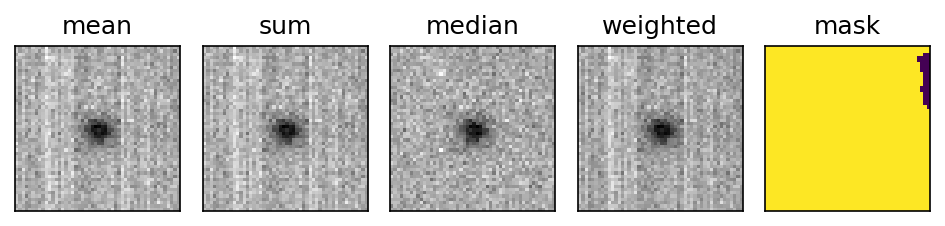

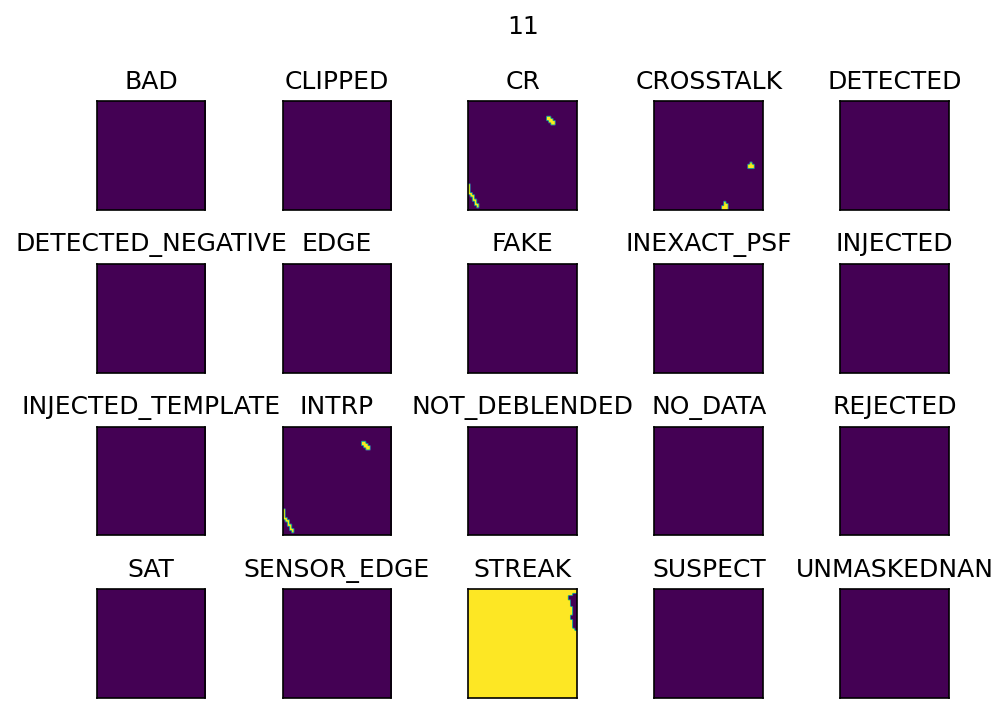

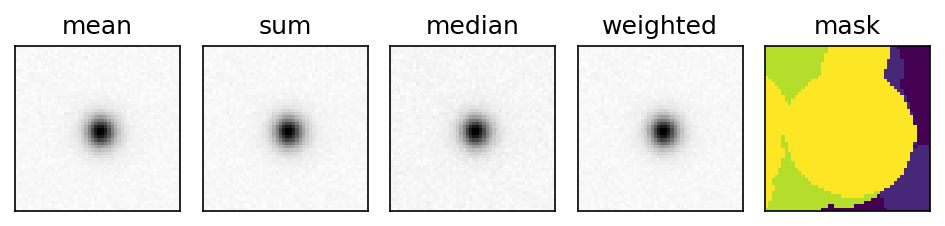

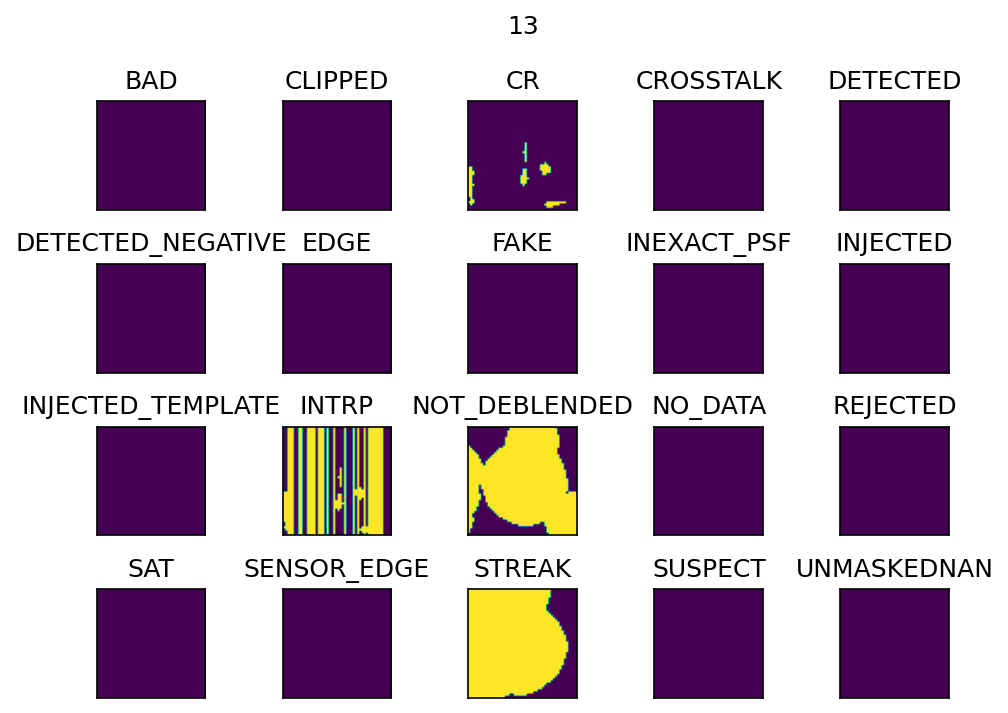

In [140]:
for k in d[0]:
    fig = plot_summary_coadds(d[0][k].summary)
#     fig.suptitle(k)
    fig.tight_layout()
    plt.show()
    fig = plot_coadd_masks(d[0][k].summary)
    fig.suptitle(k)
    fig.tight_layout()
    plt.show()

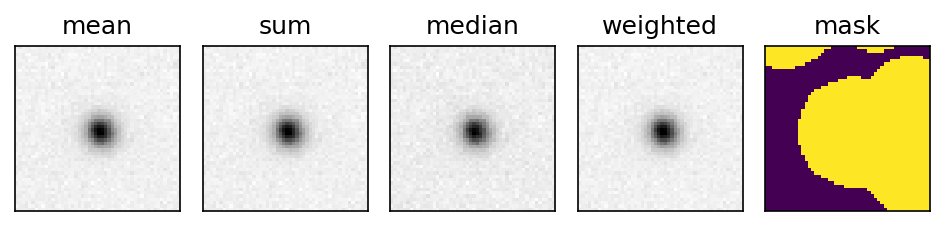

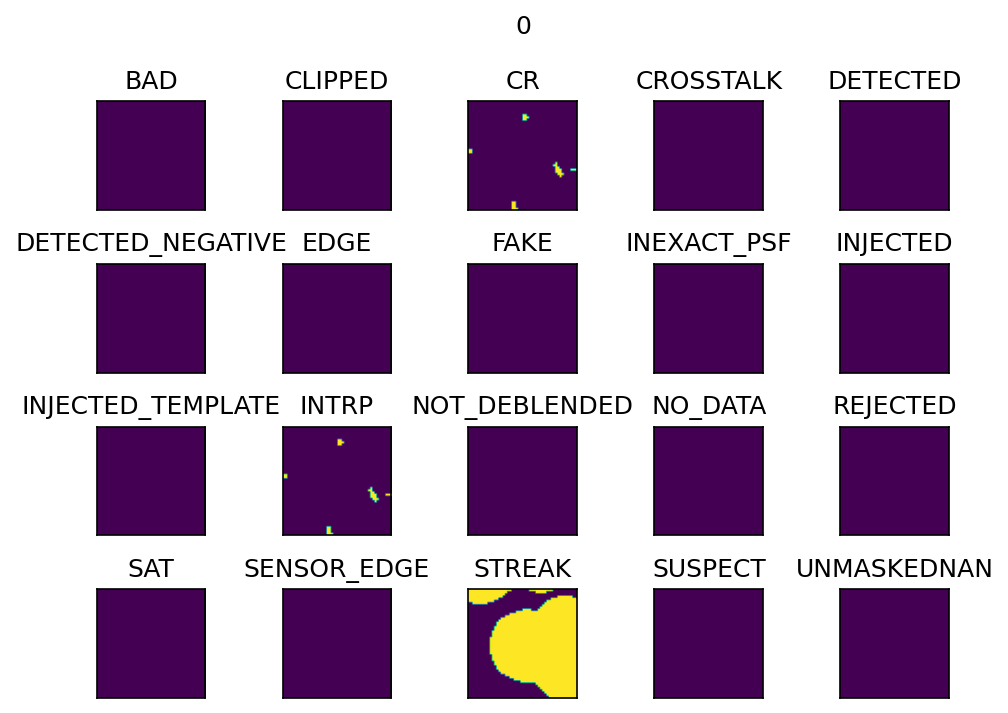

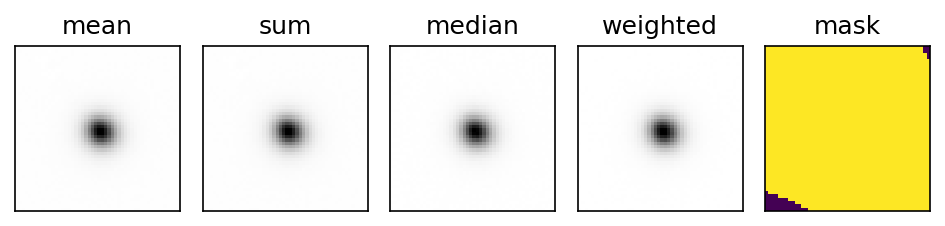

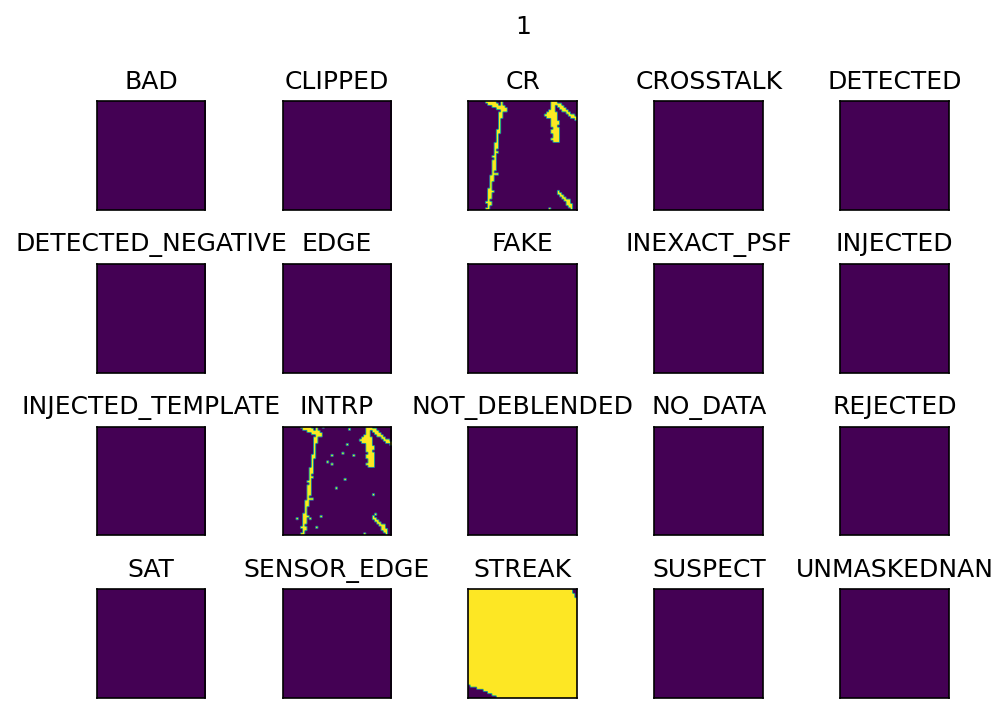

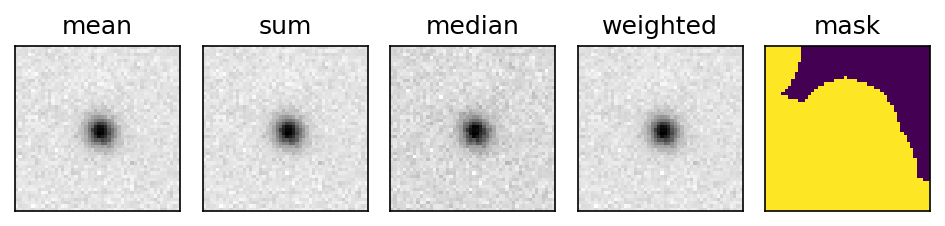

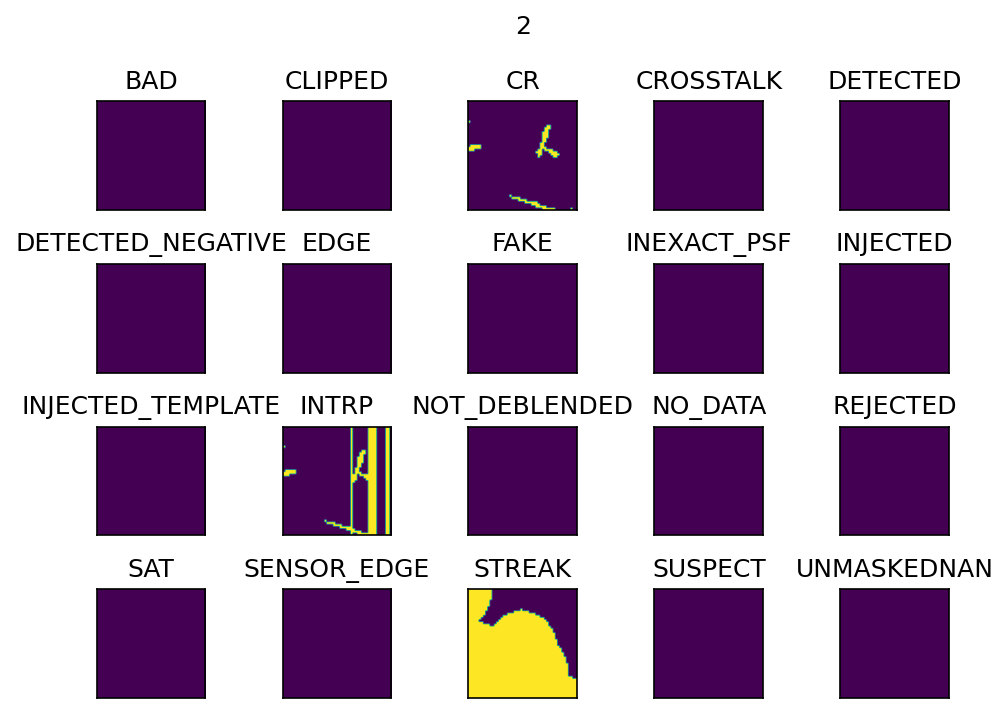

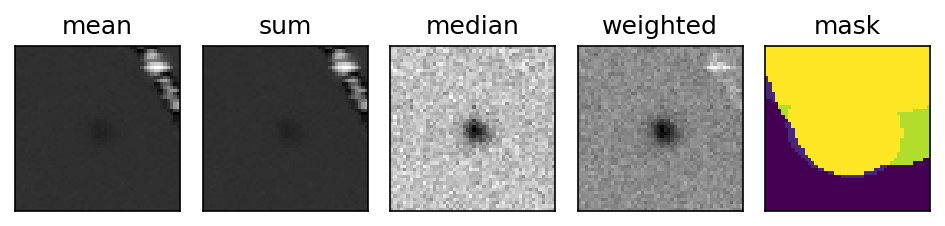

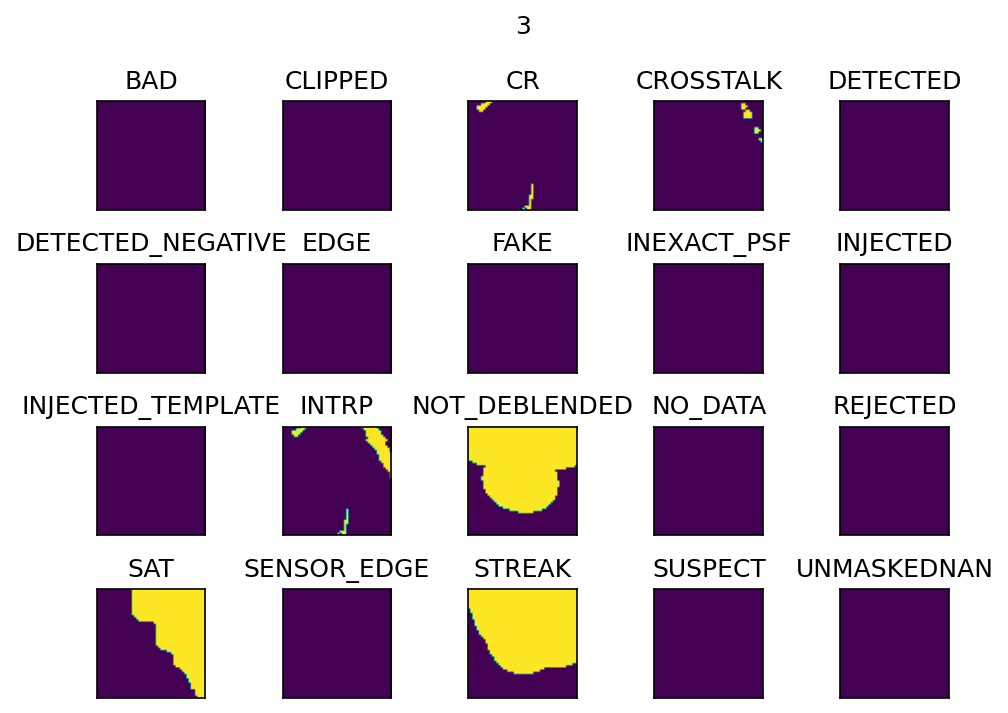

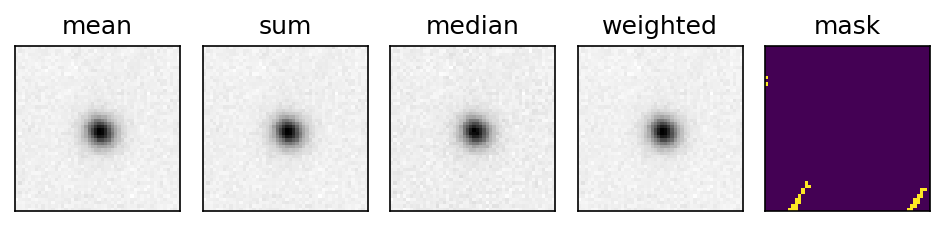

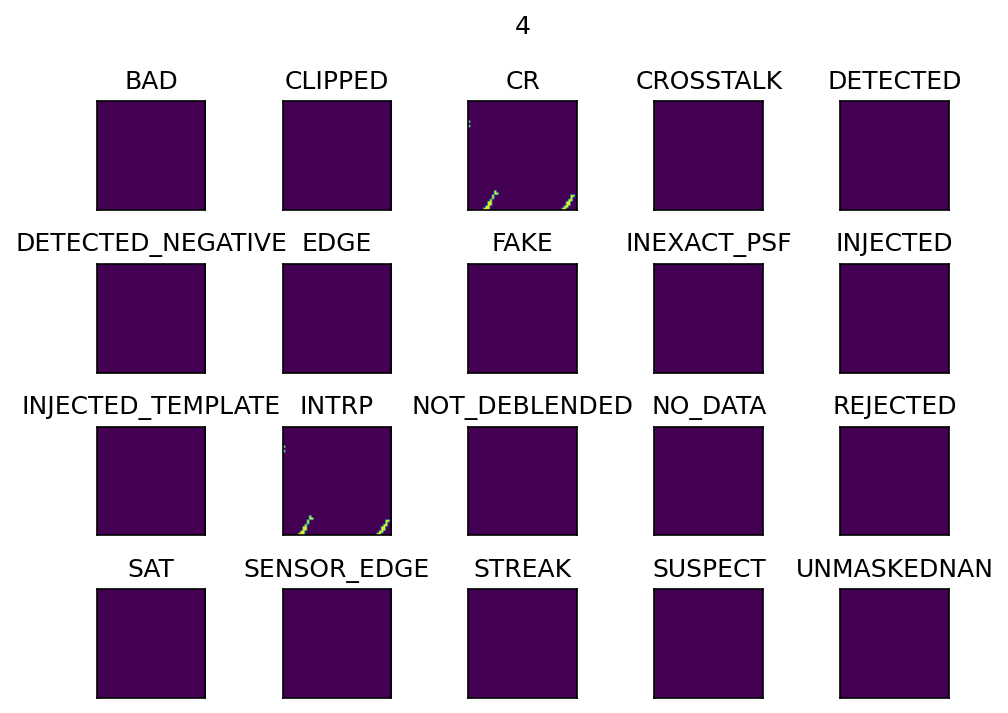

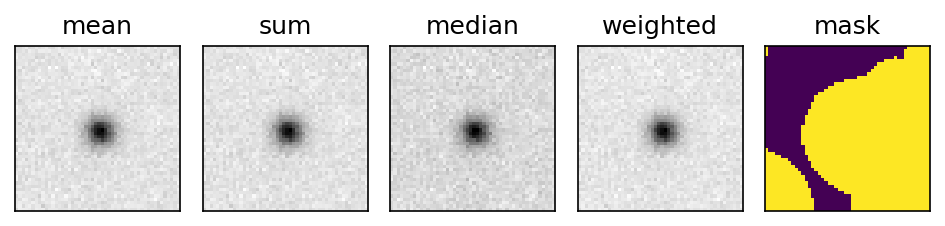

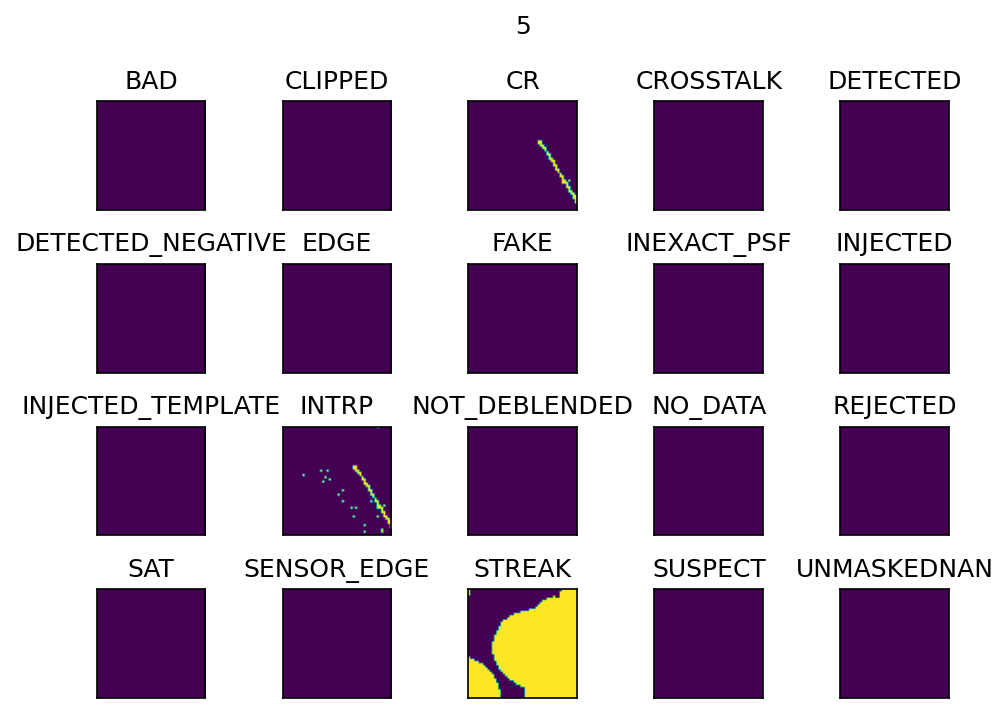

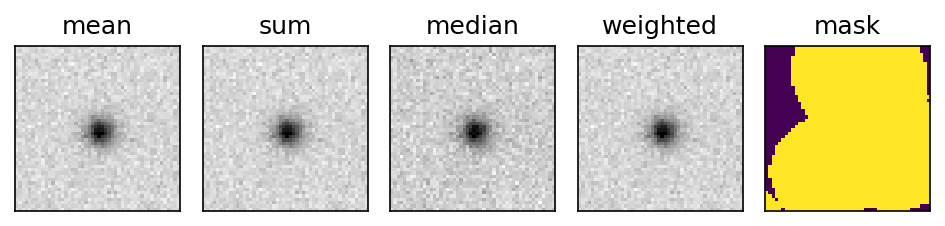

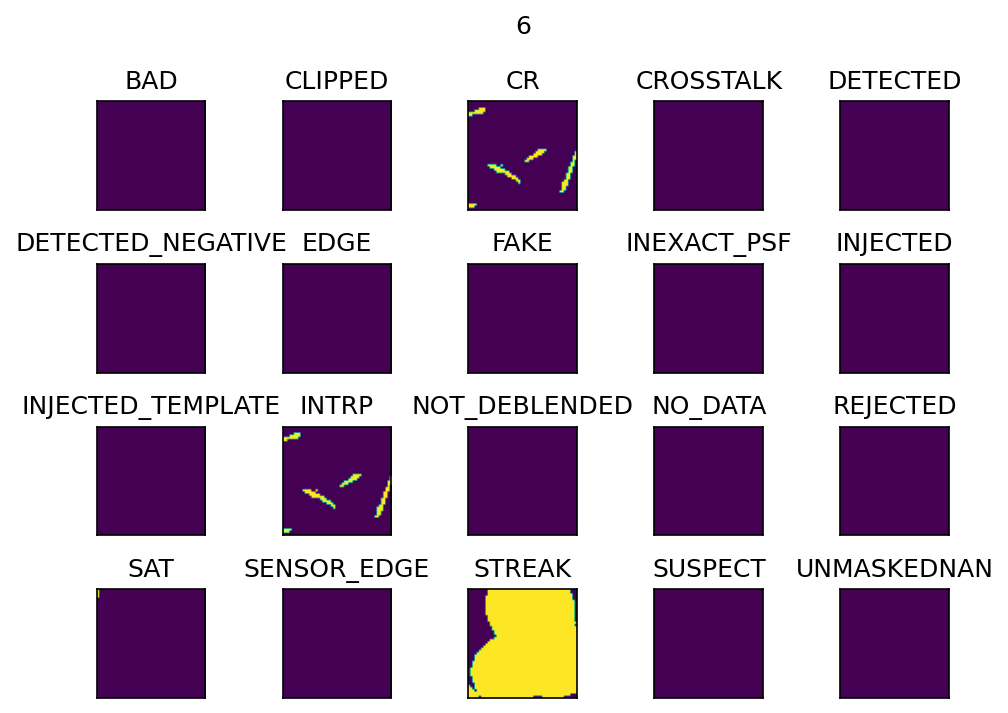

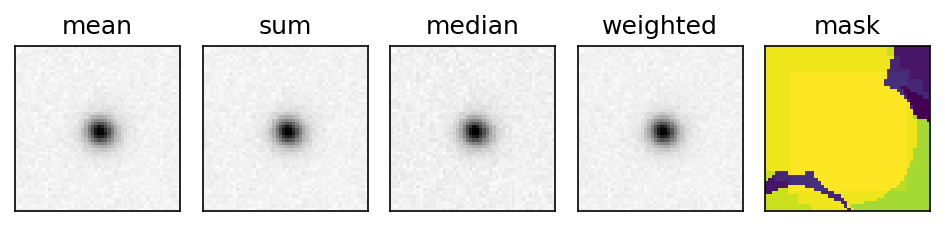

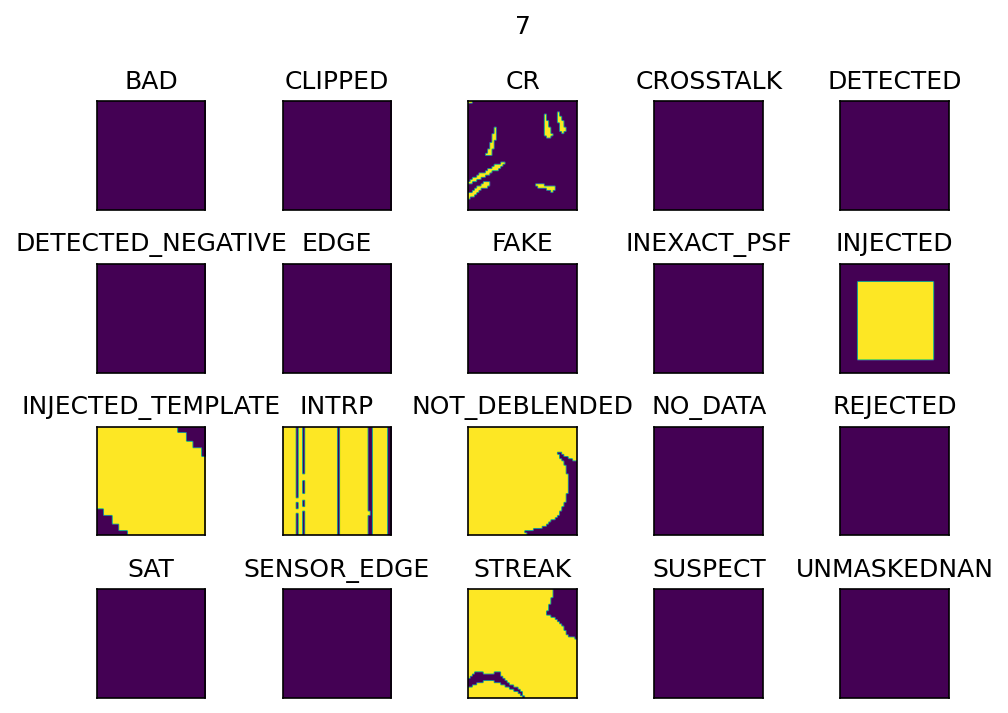

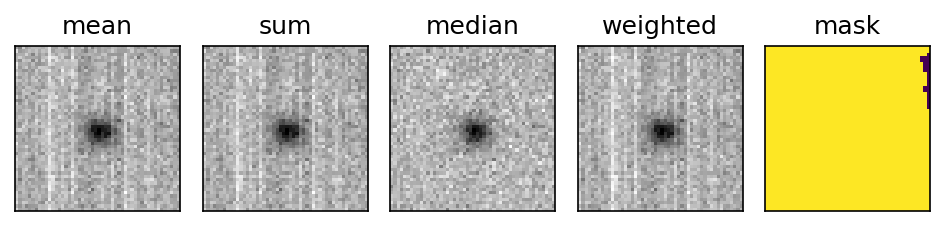

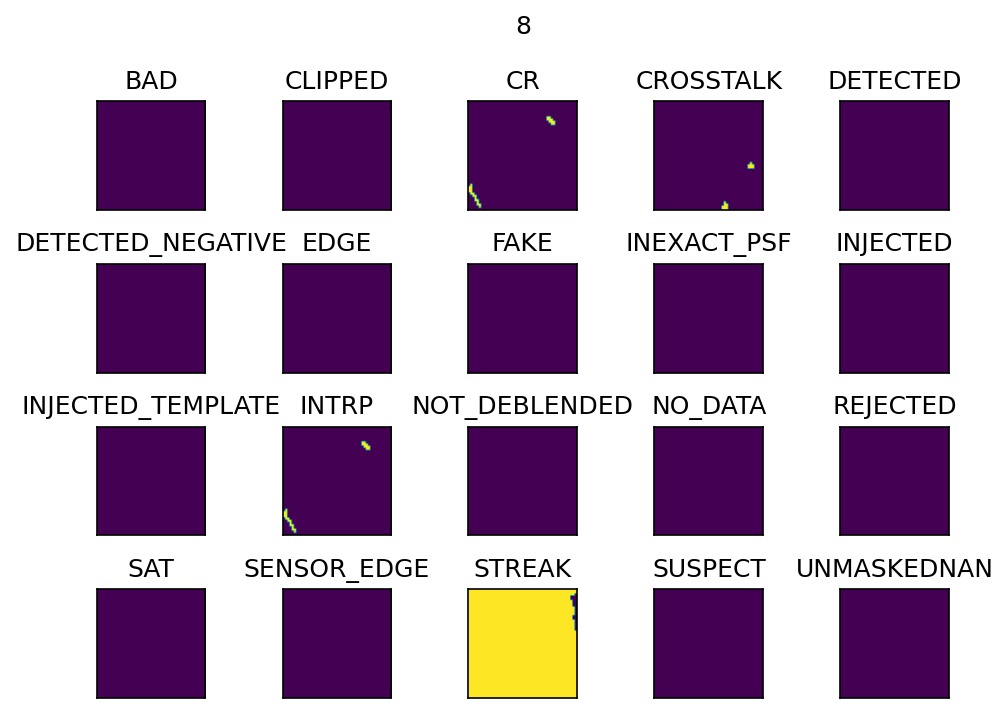

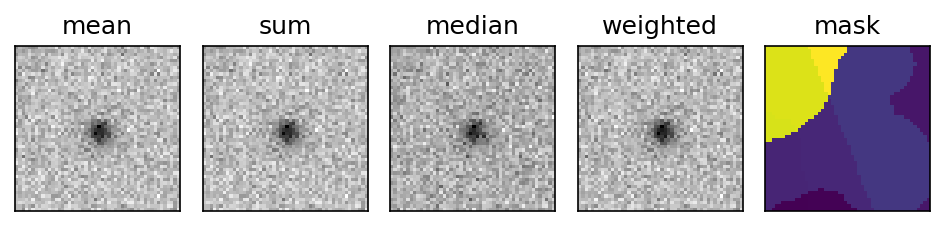

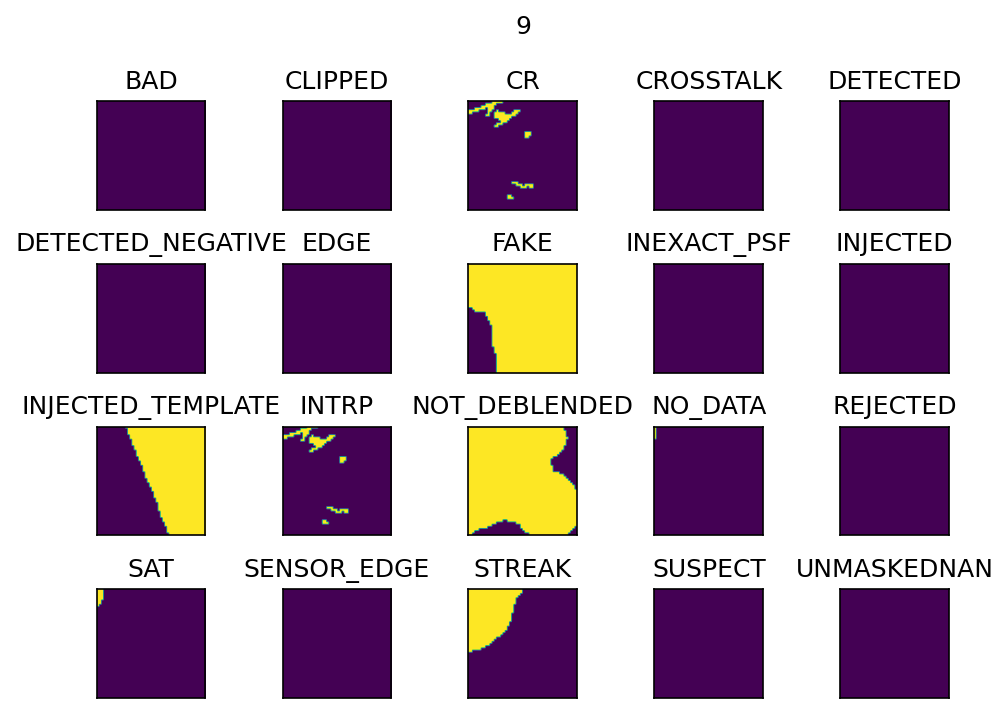

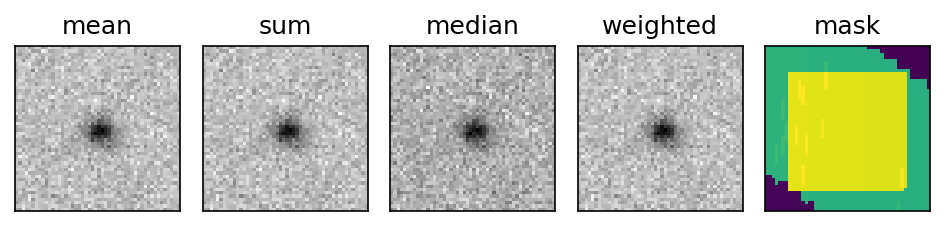

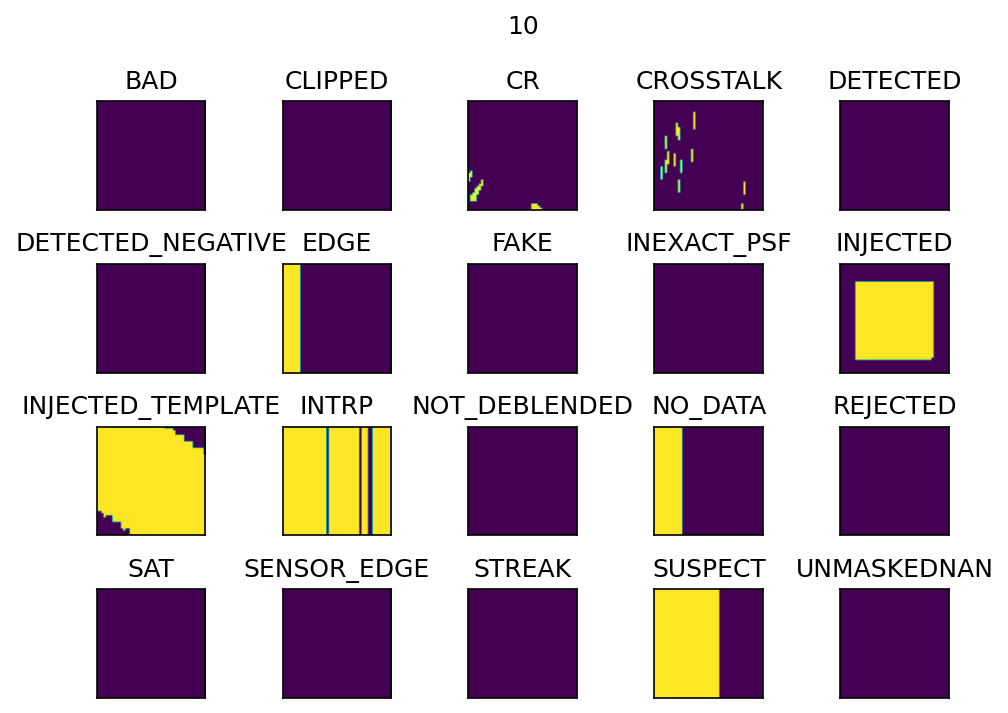

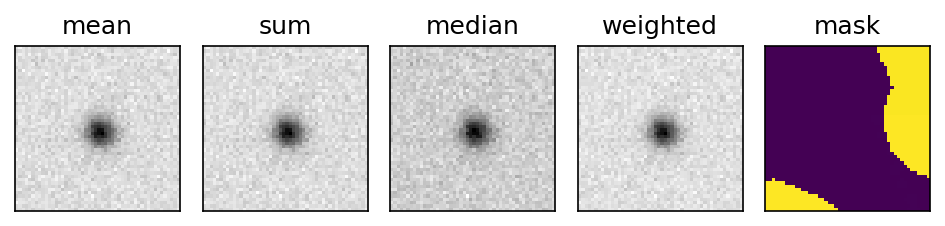

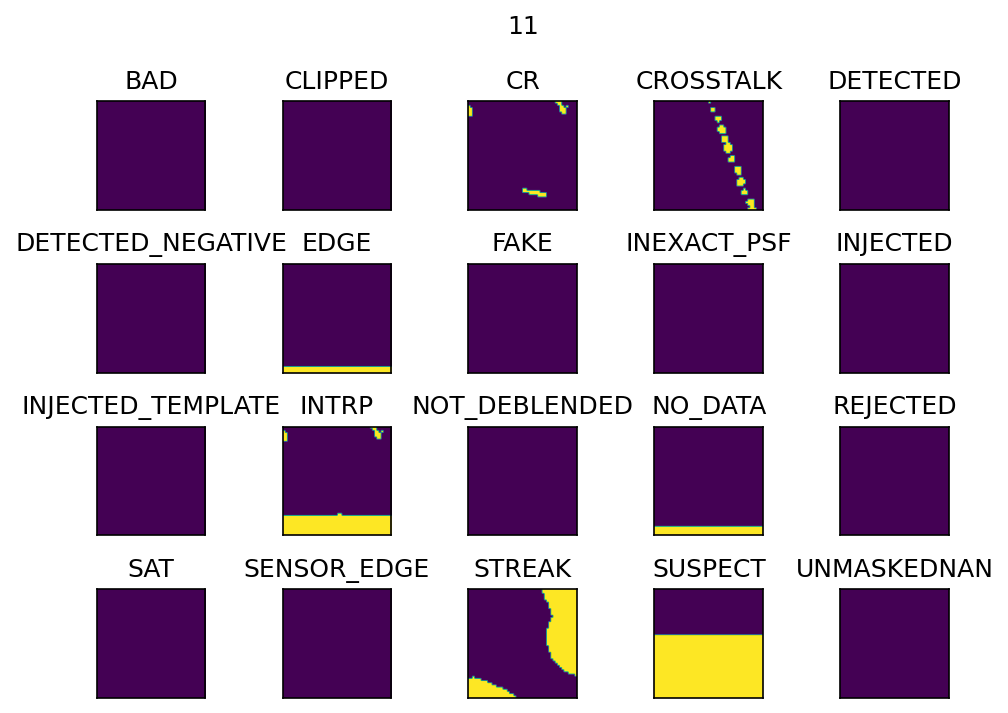

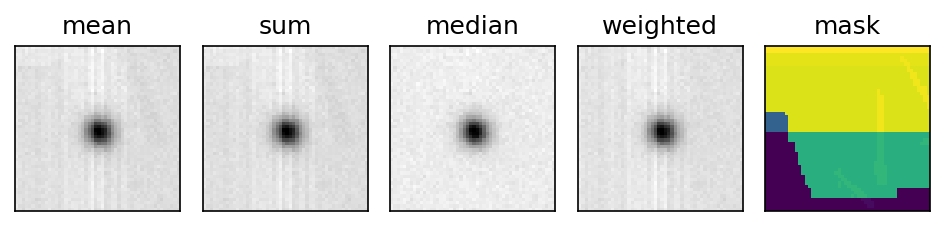

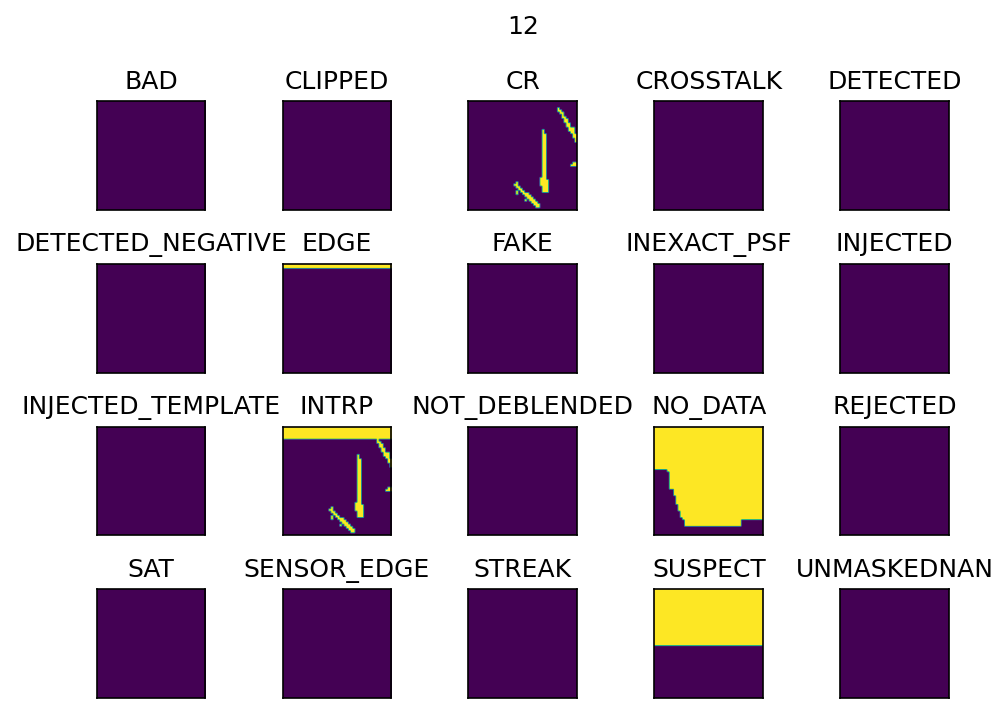

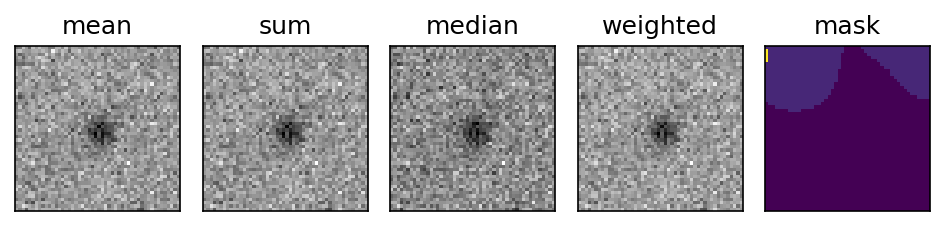

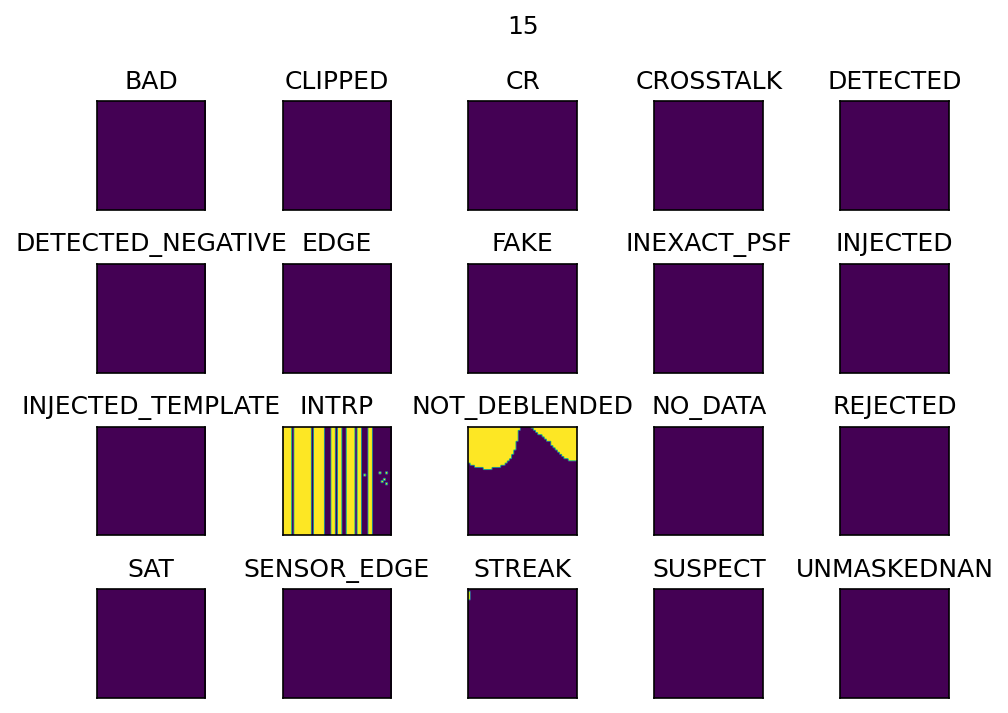

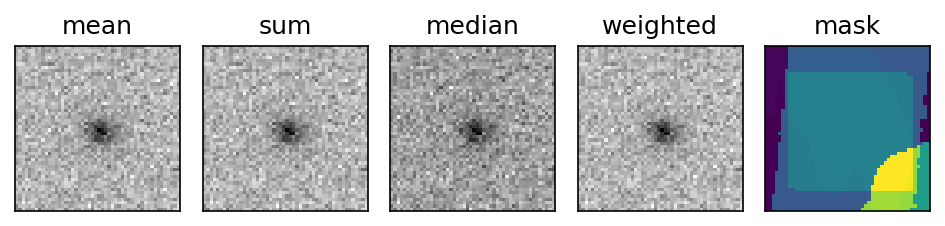

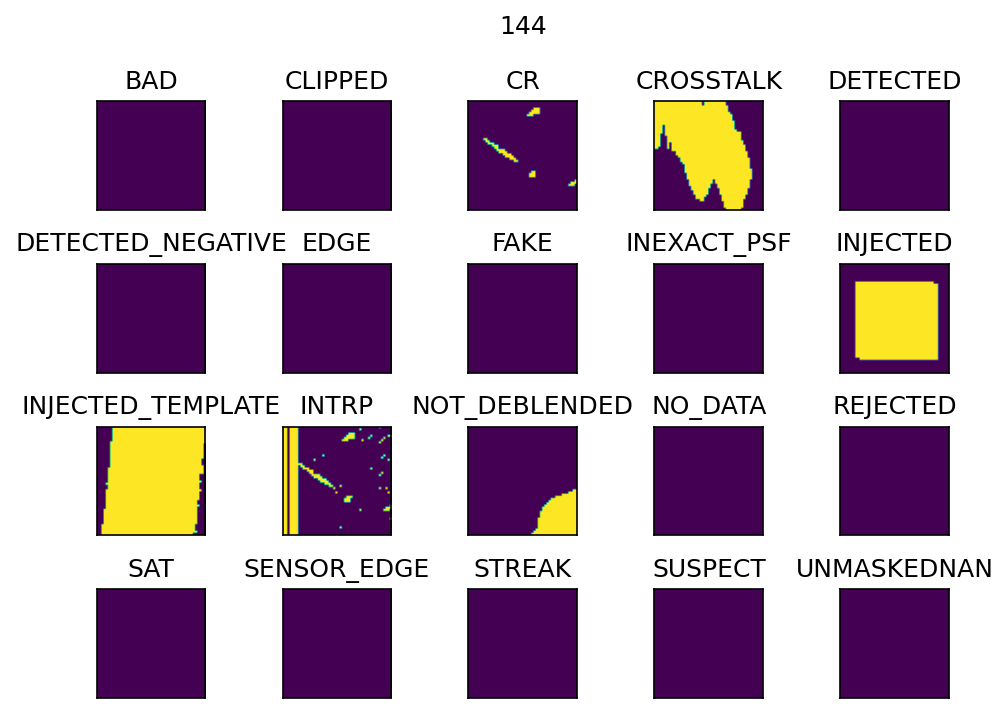

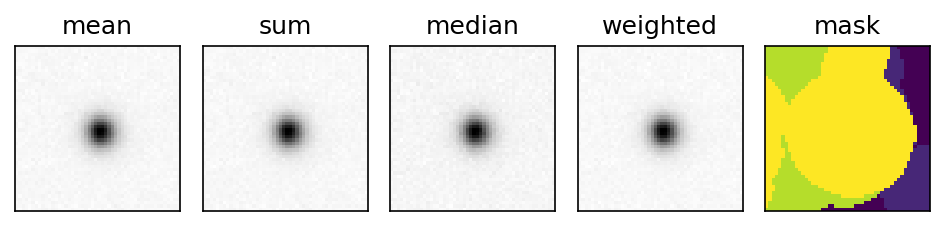

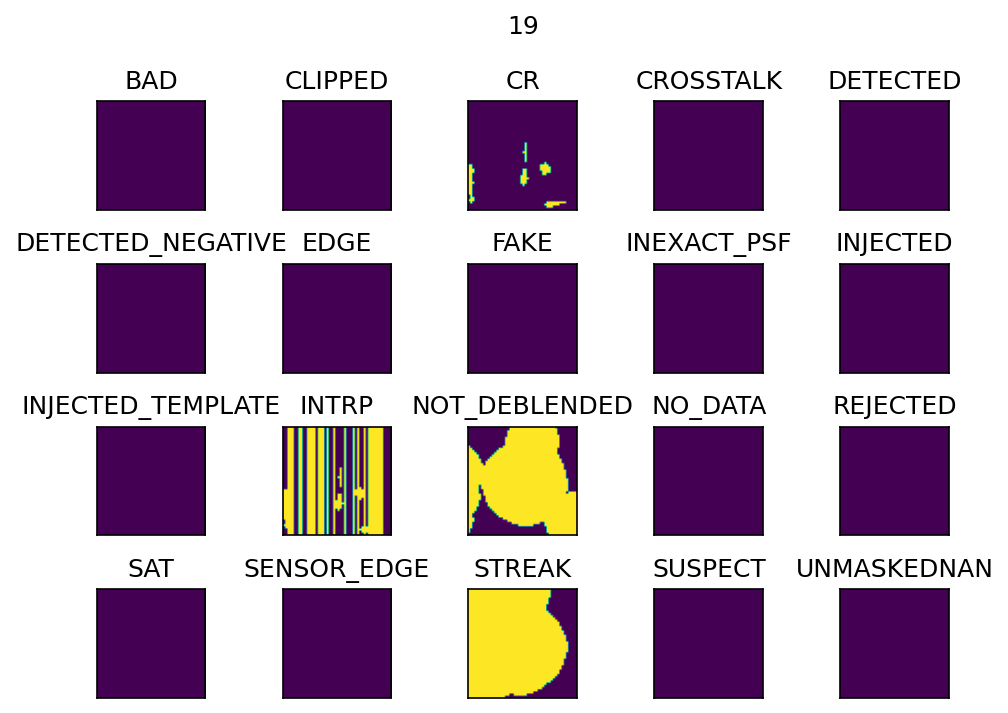

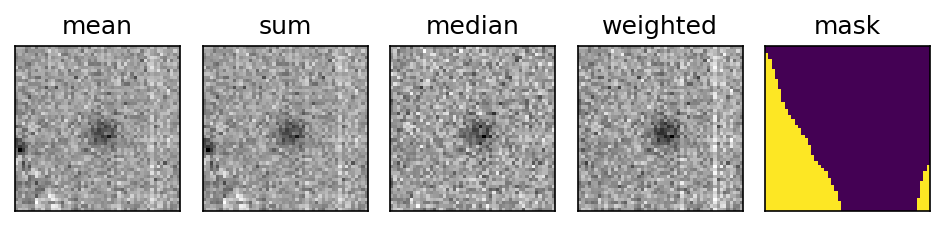

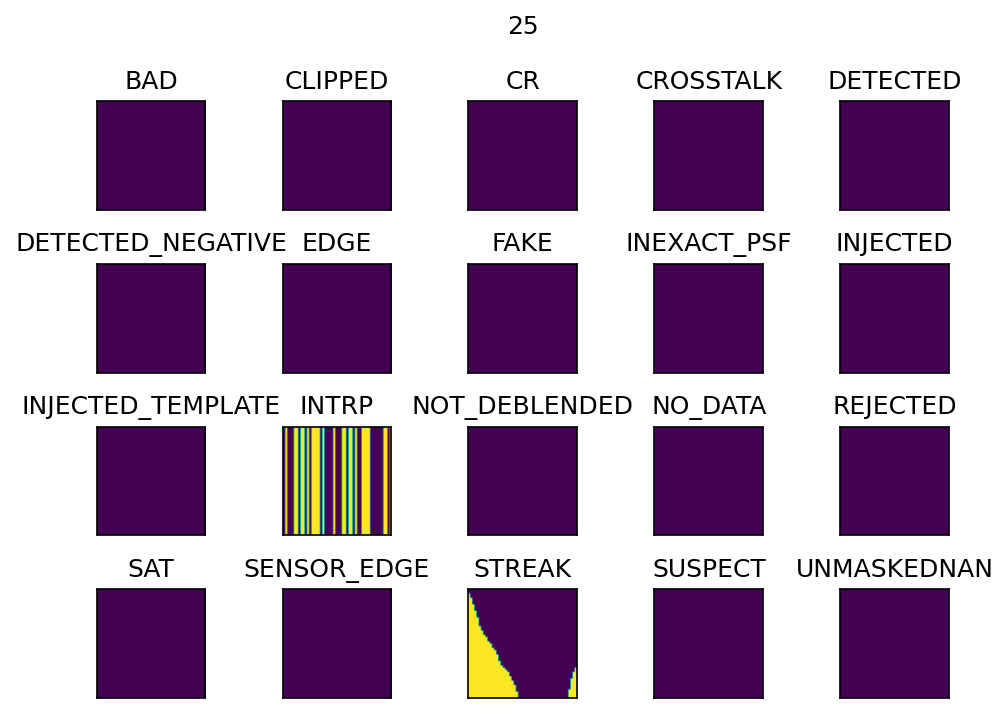

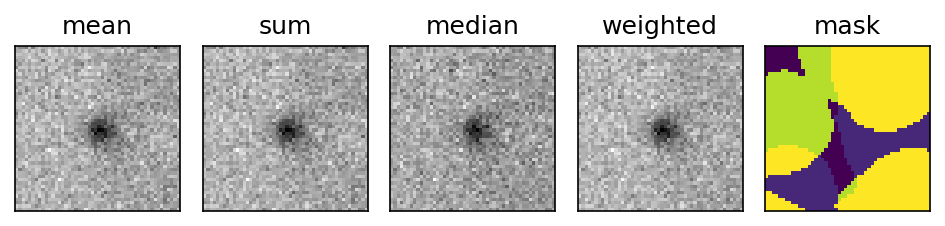

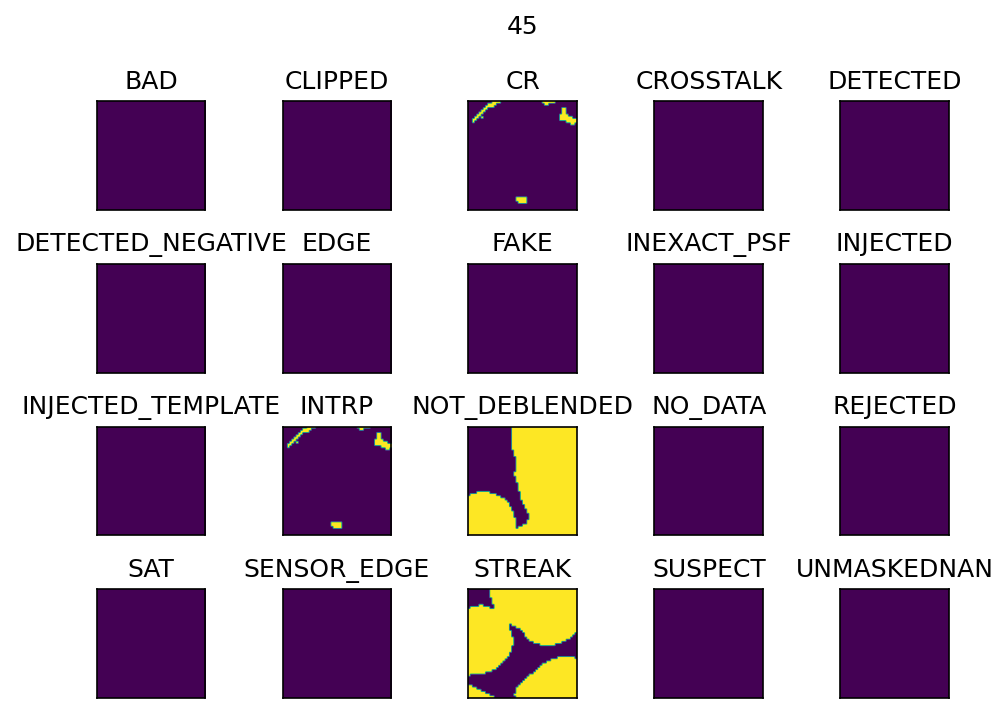

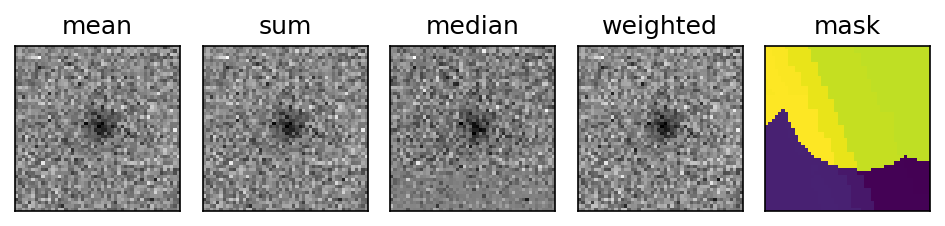

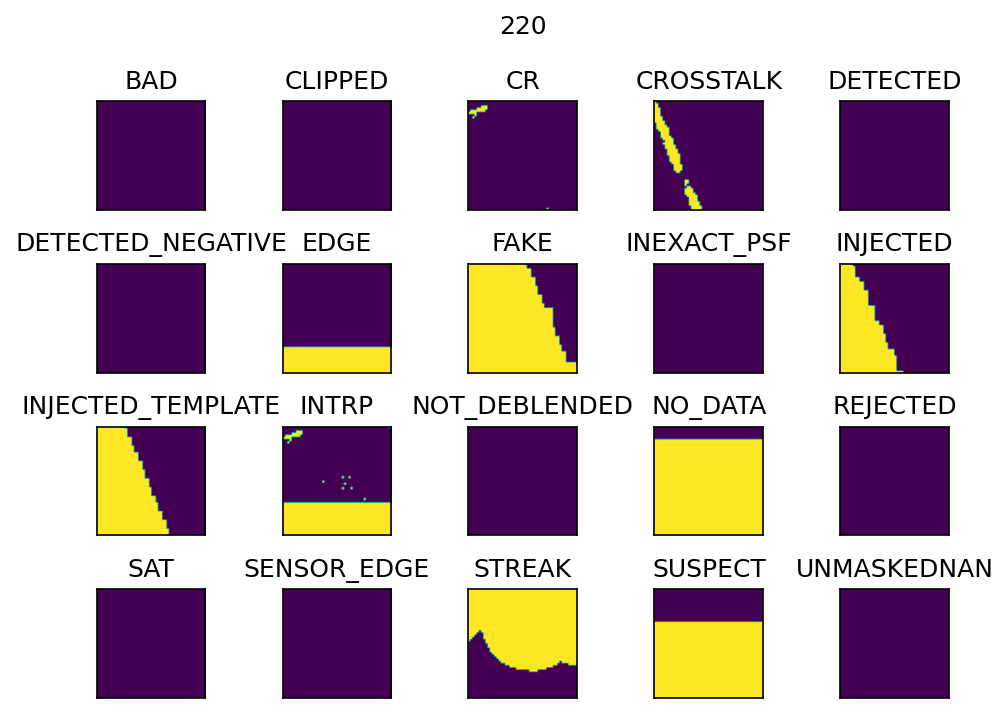

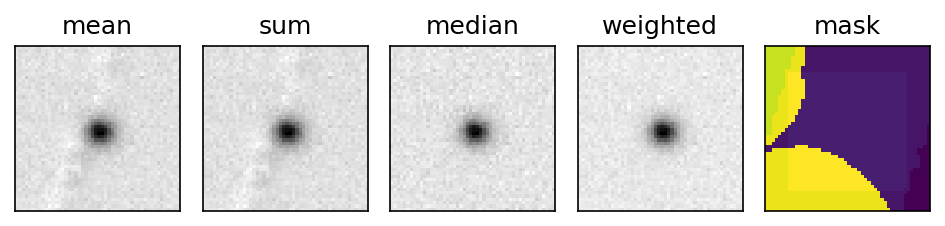

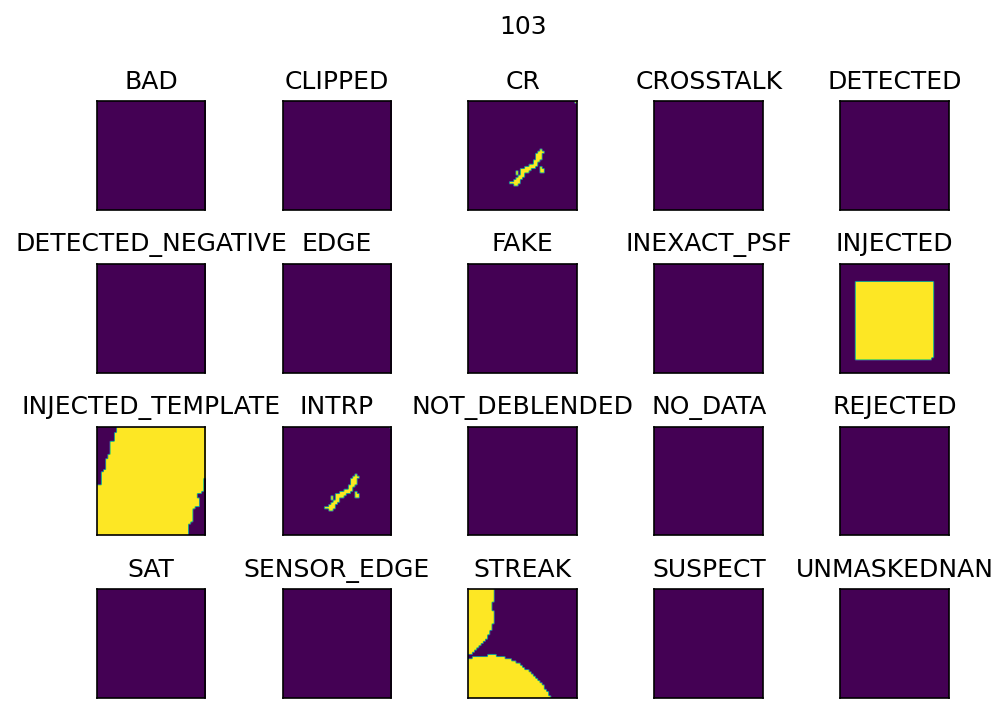

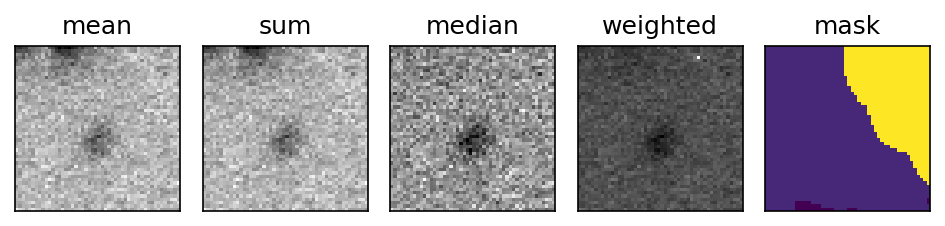

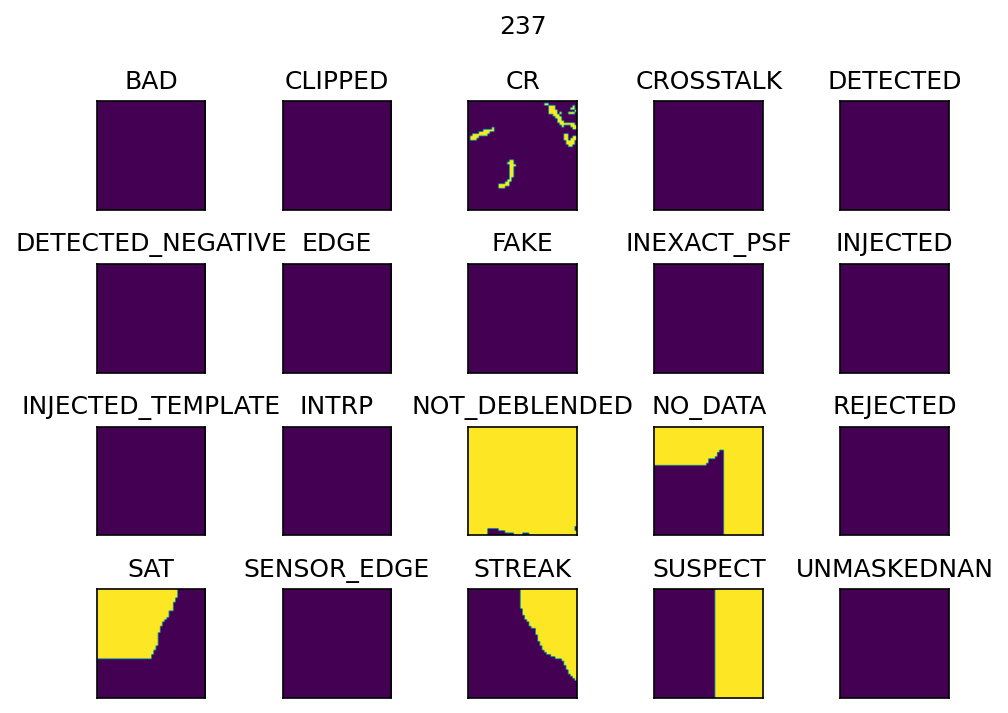

In [143]:
for k in d[-1]:
    fig = plot_summary_coadds(d[-1][k].summary)
#     fig.suptitle(k)
    fig.tight_layout()
    plt.show()
    fig = plot_coadd_masks(d[-1][k].summary)
    fig.suptitle(k)
    fig.tight_layout()
    plt.show()

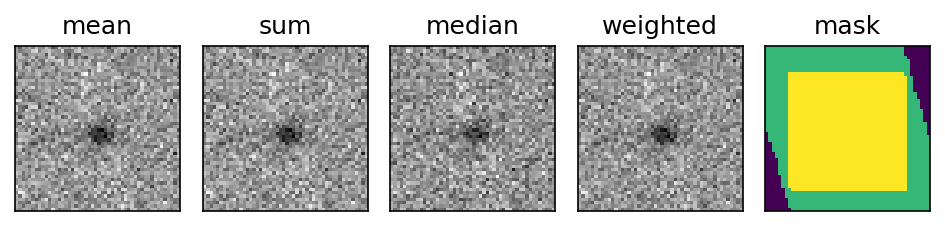

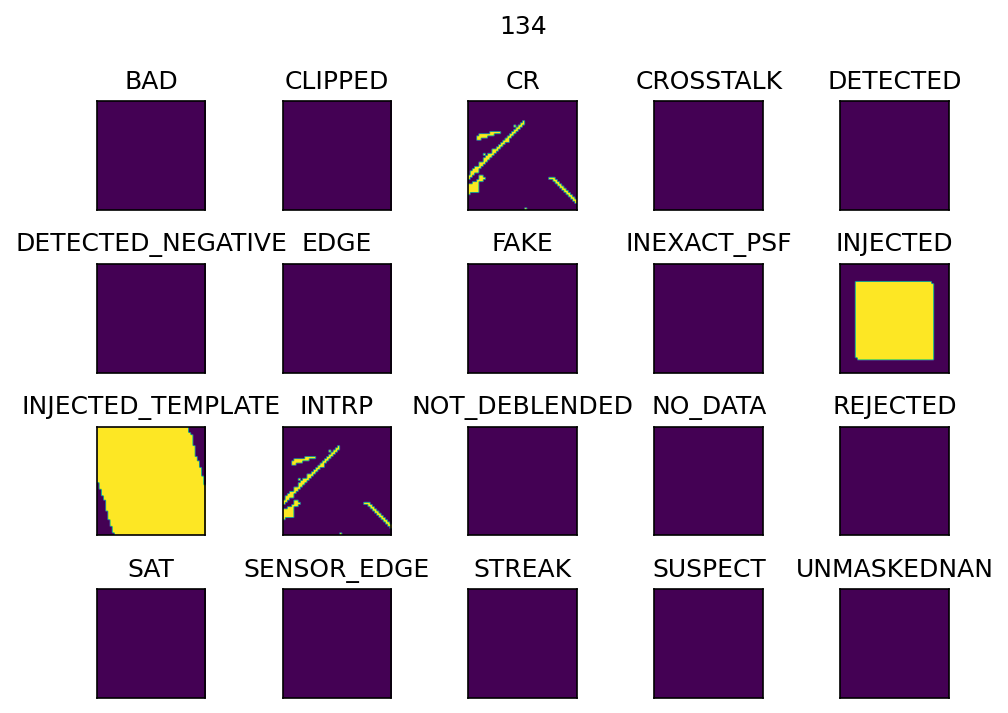

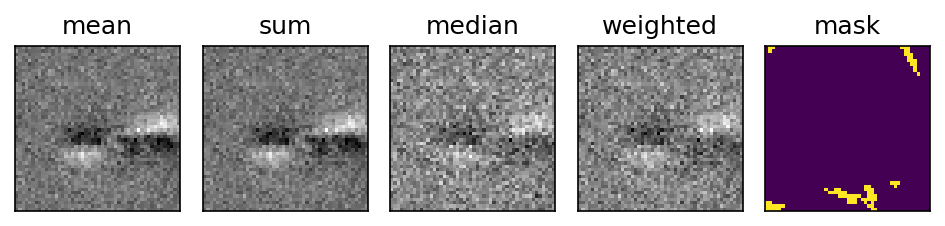

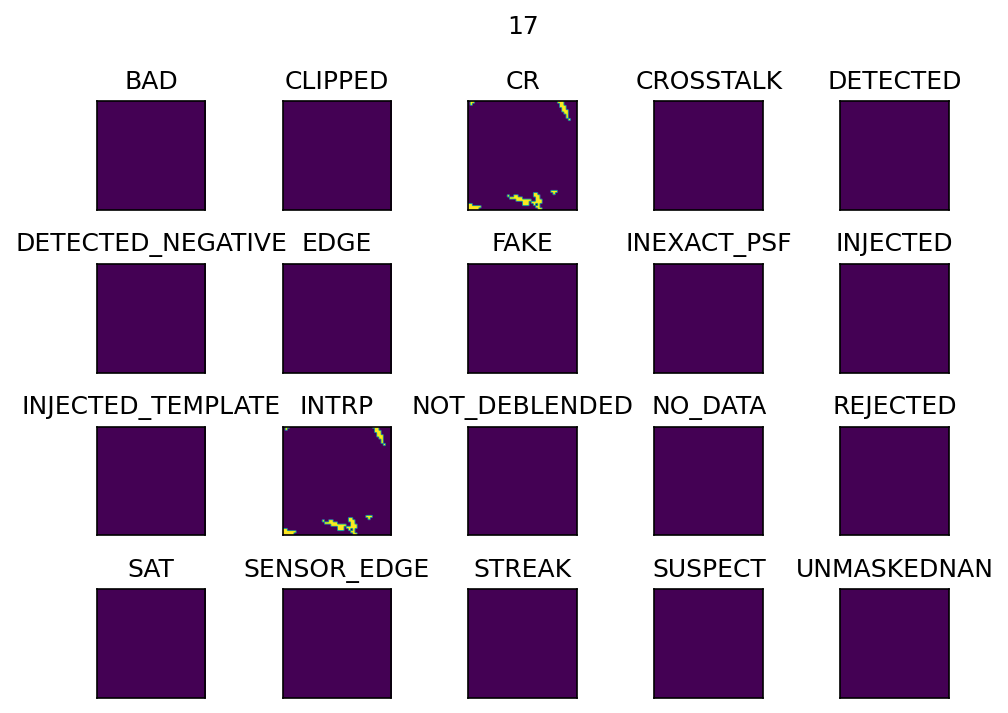

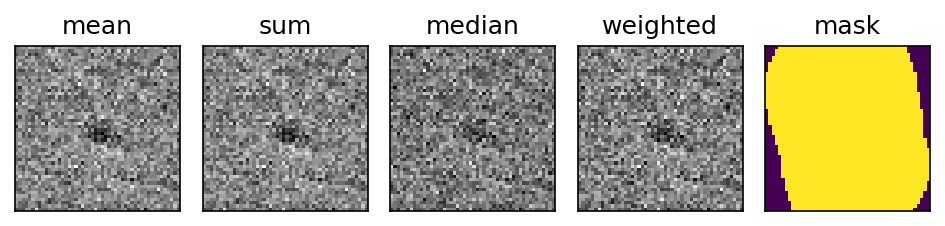

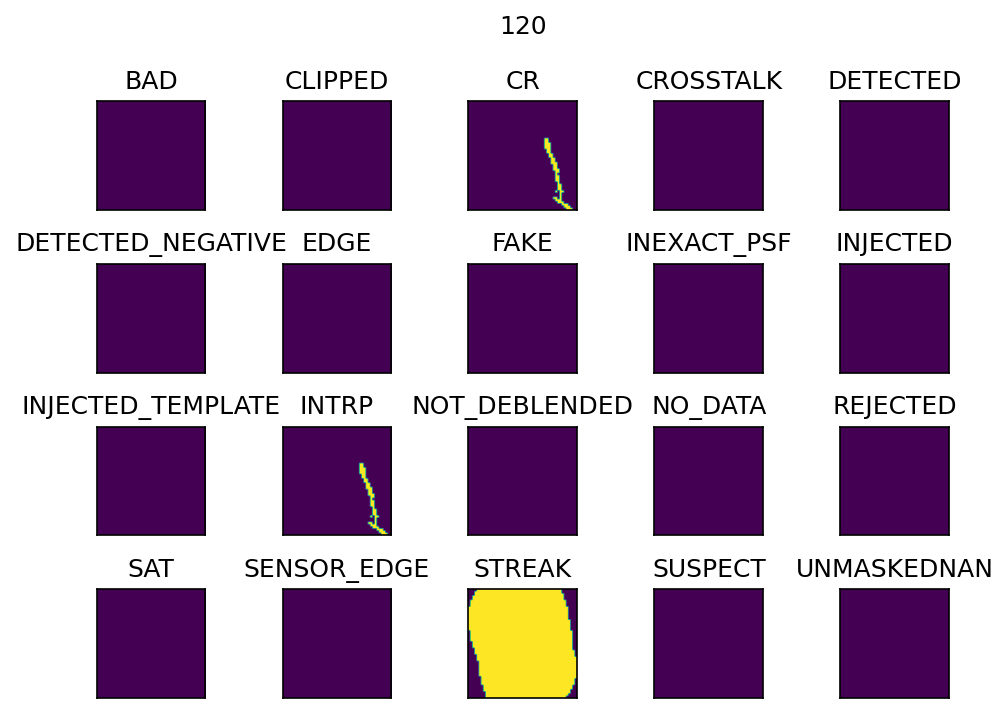

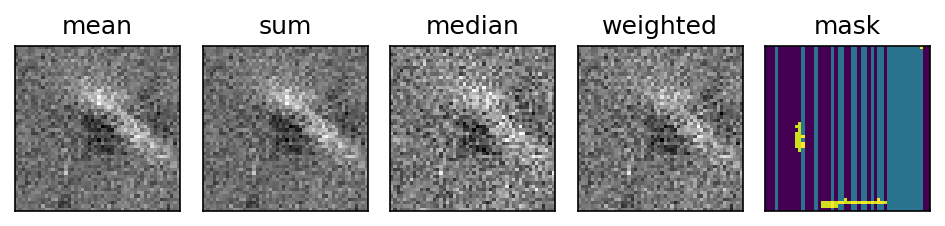

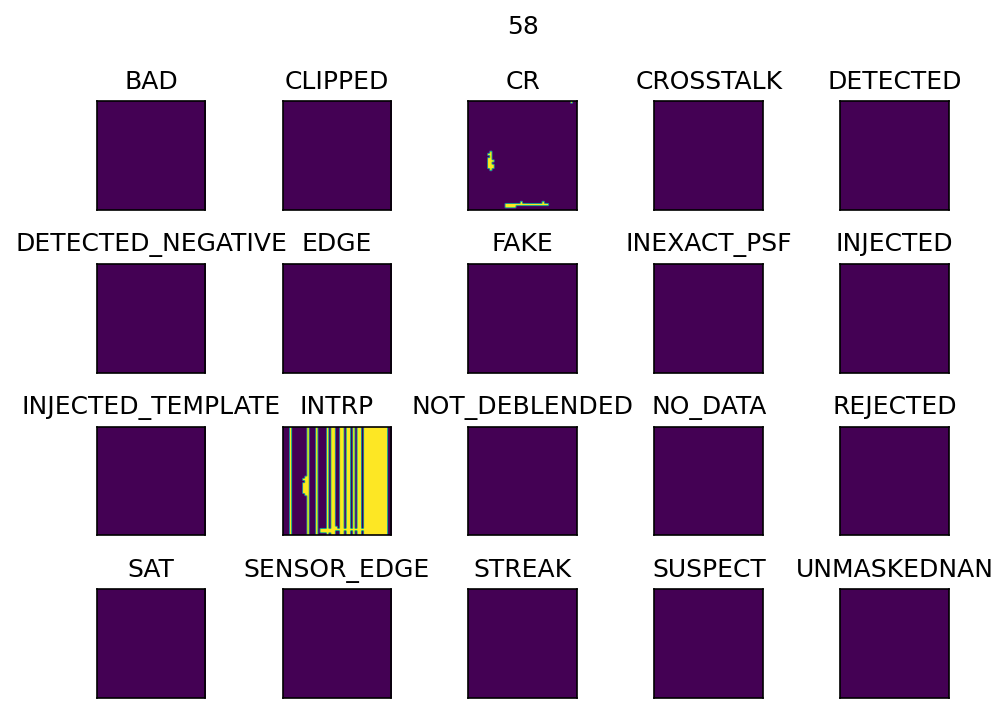

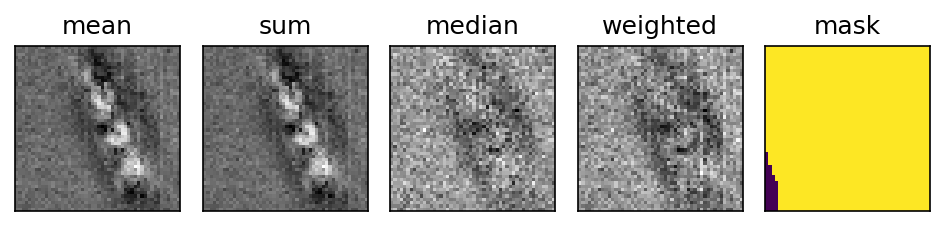

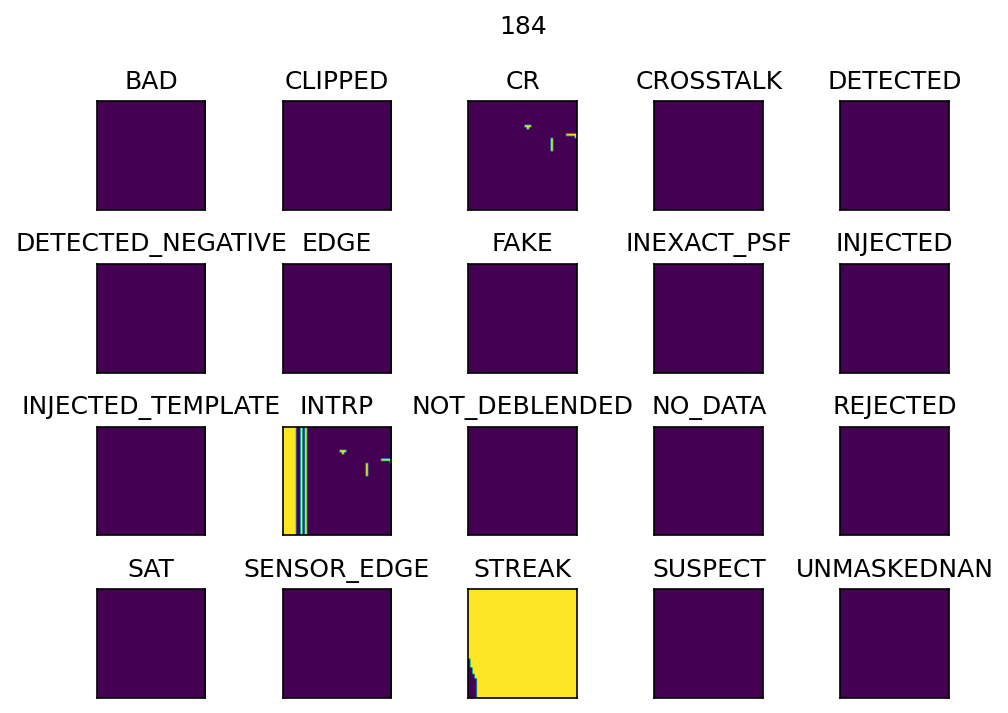

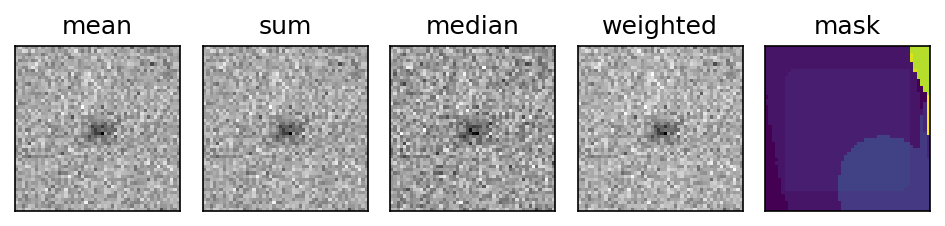

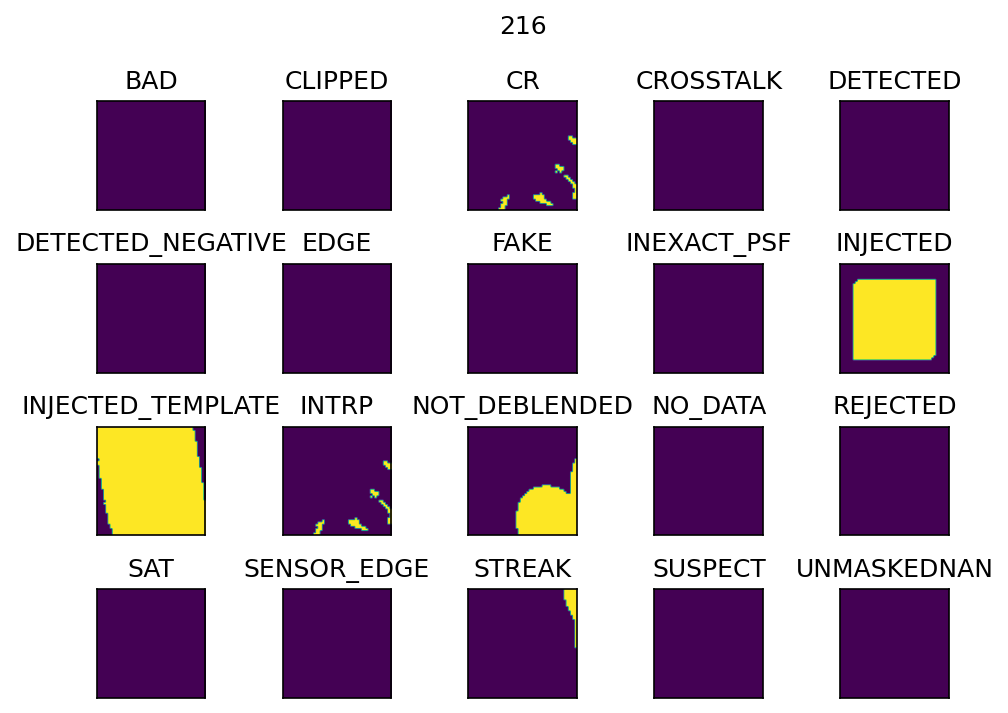

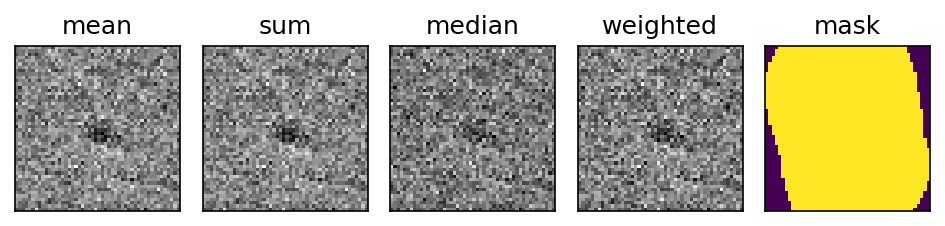

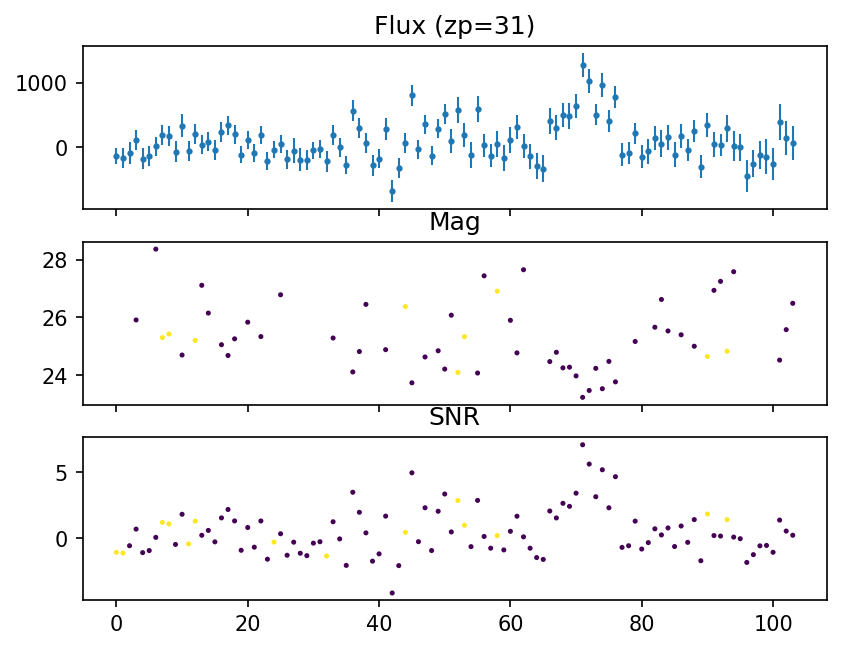

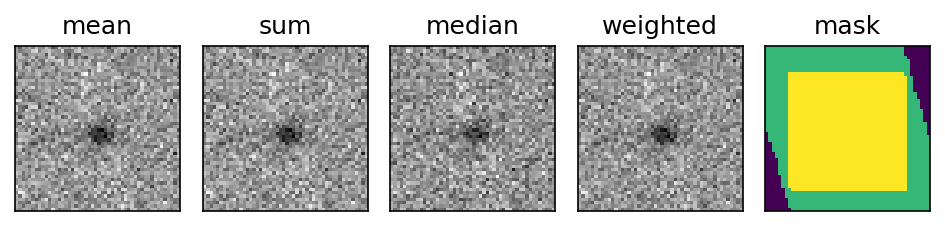

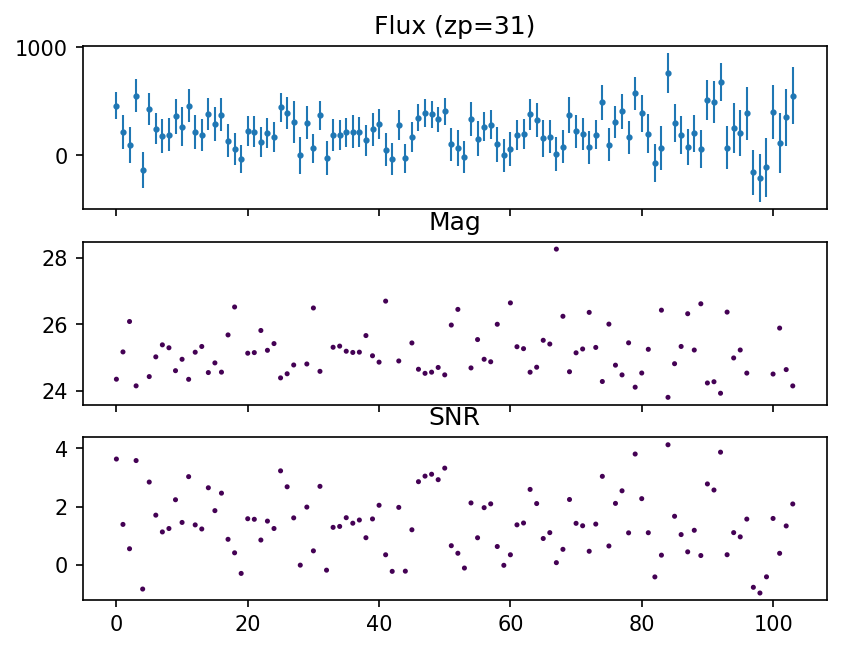

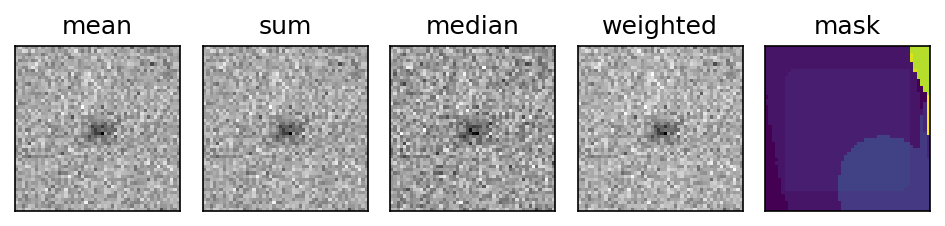

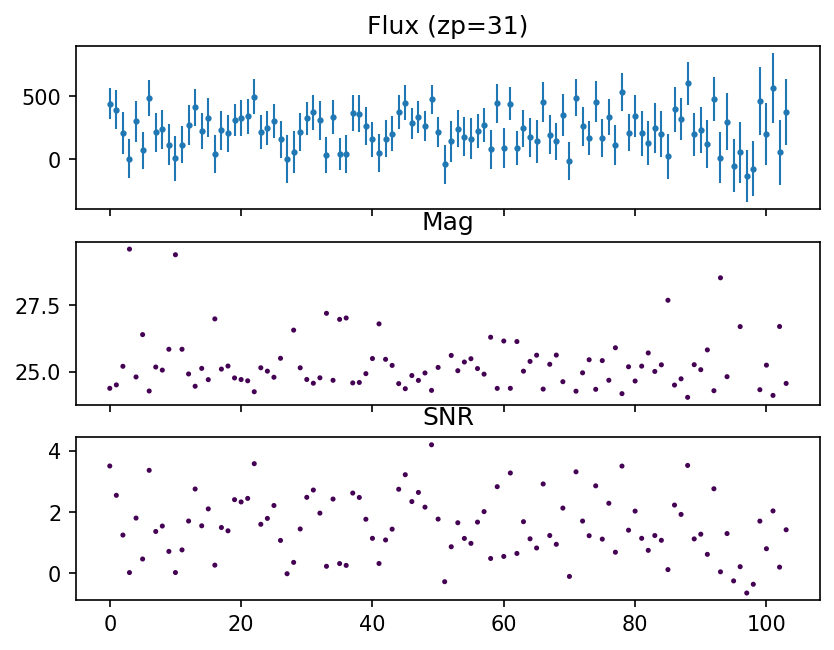

In [170]:
c = read("/epyc/projects/salad/search/single_search/DEEP/20190403/A0c/detector_1/snr_3.0/regular/tno/filtered_summary.pkl")
for k in c:
    fig = plot_summary_coadds(c[k].summary)
#     fig.suptitle(k)
    fig.tight_layout()
    plt.show()
    fig = plot_coadd_masks(c[k].summary)
    fig.suptitle(k)
    fig.tight_layout()
    plt.show()
    
for k in [120, 134, 216]:
    fig = plot_summary_coadds(c[k].summary)
    #     fig.suptitle(k)
    fig.tight_layout()
    plt.show()

    plot_summary_light_curve(c[k].summary)
    plt.show()

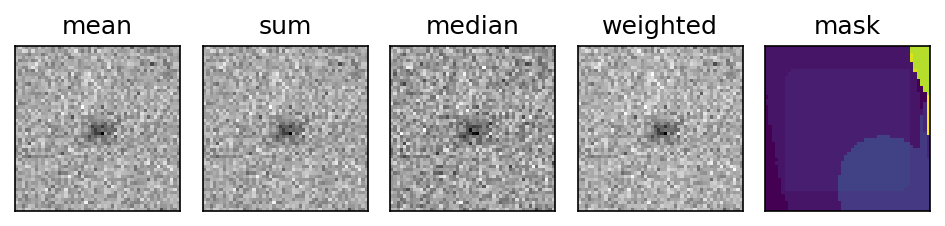

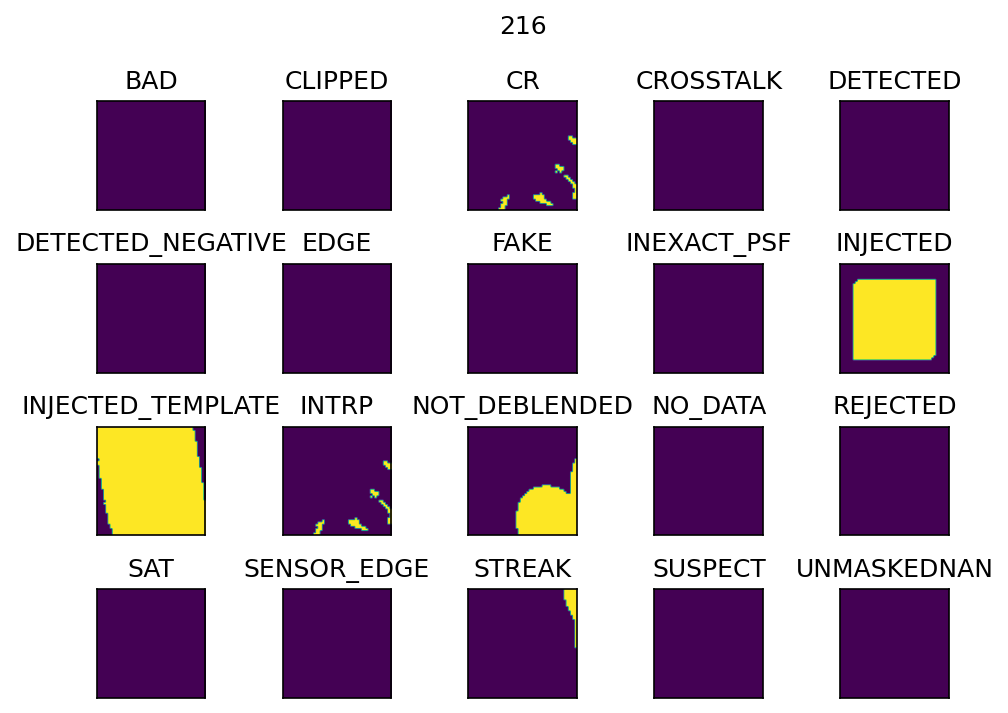

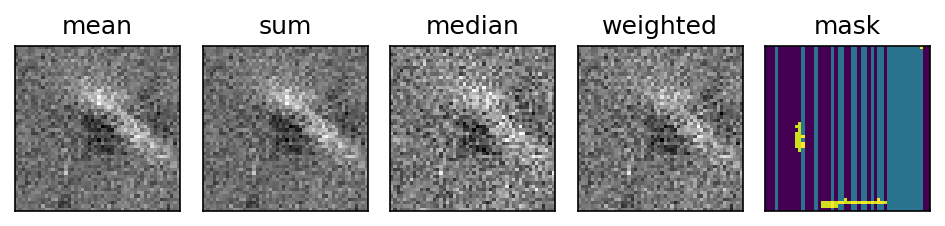

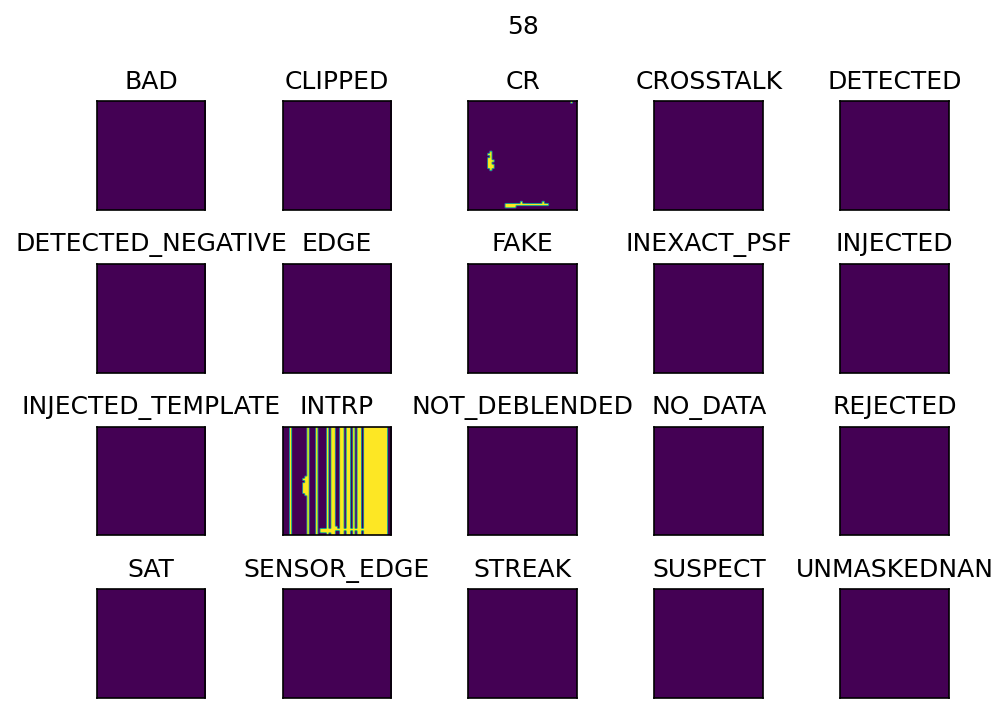

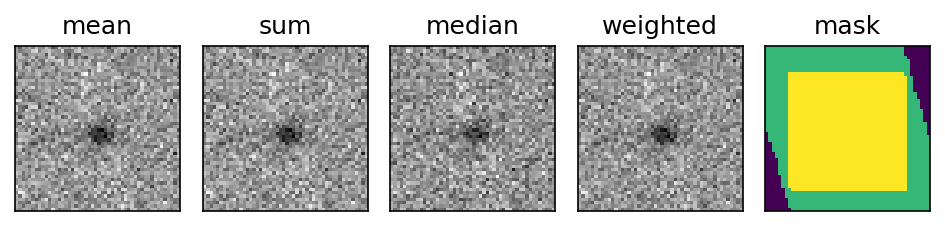

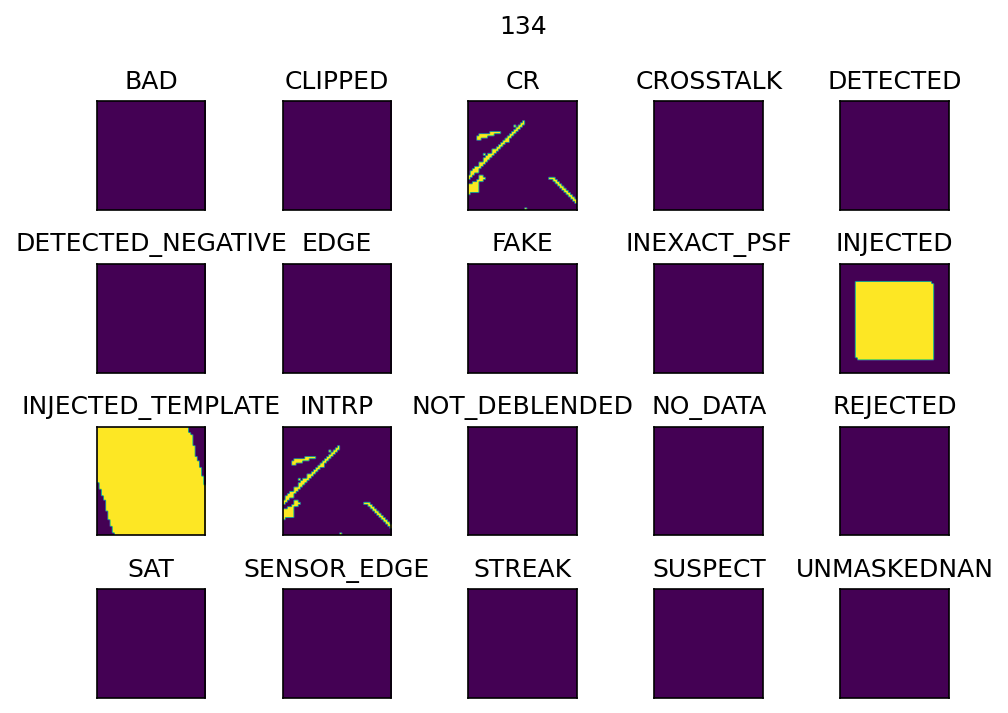

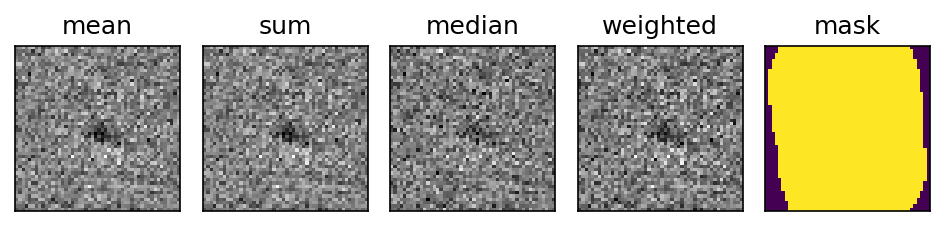

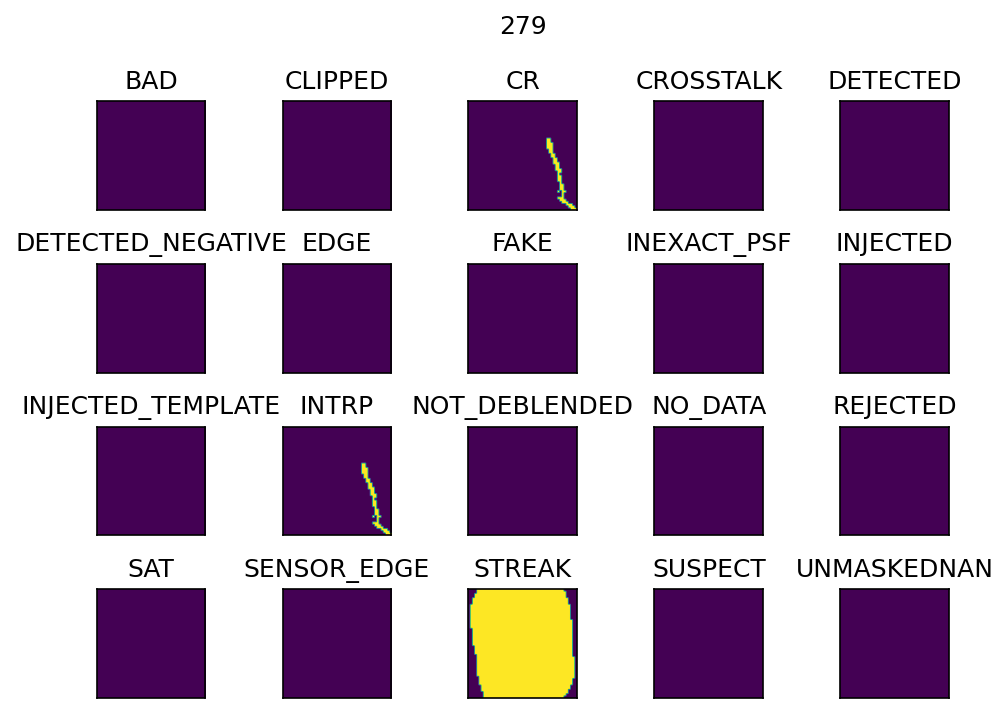

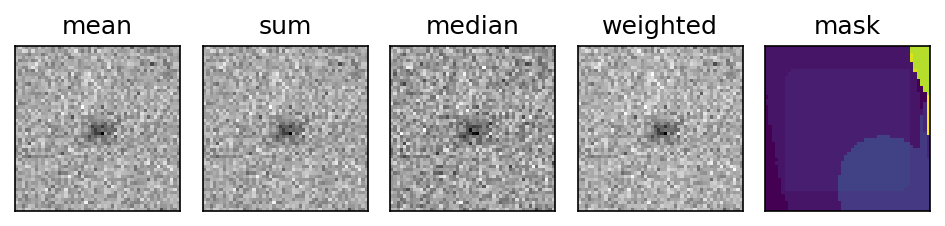

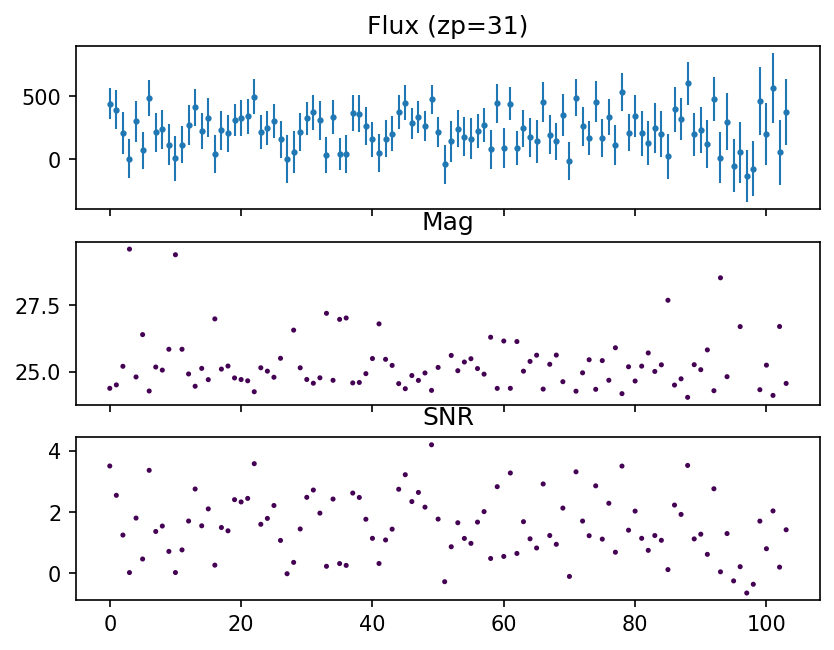

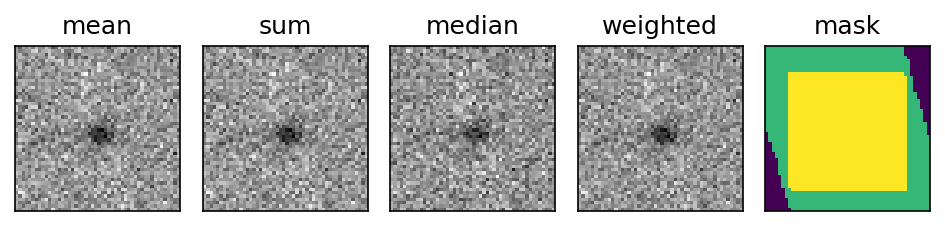

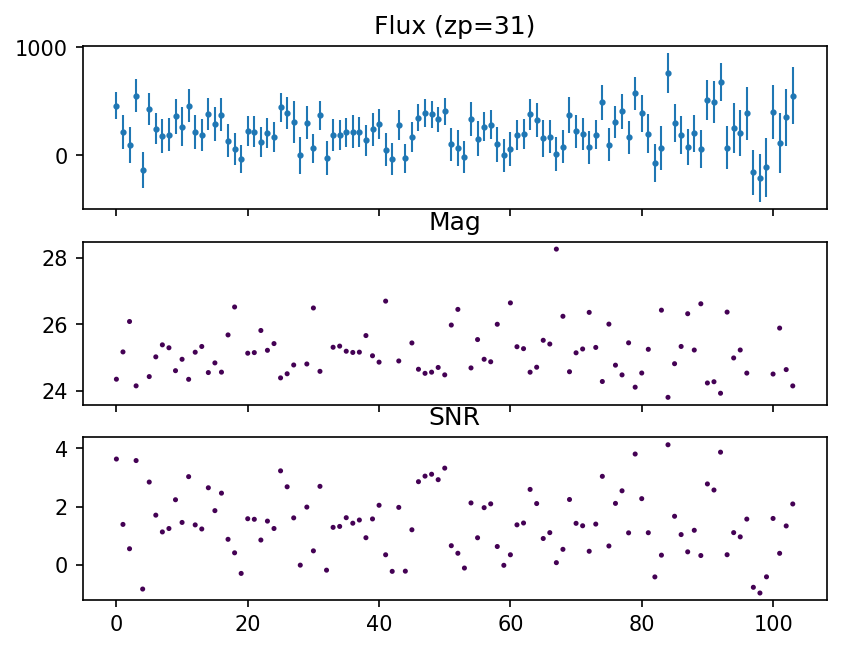

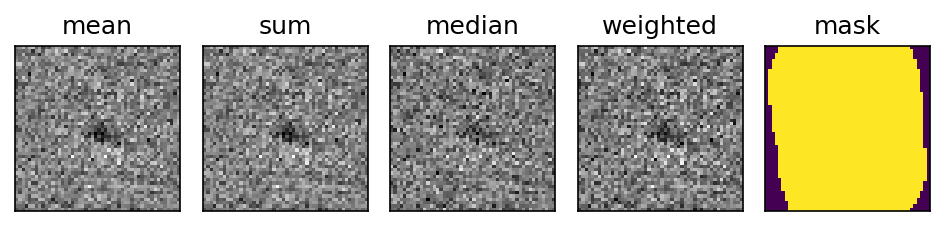

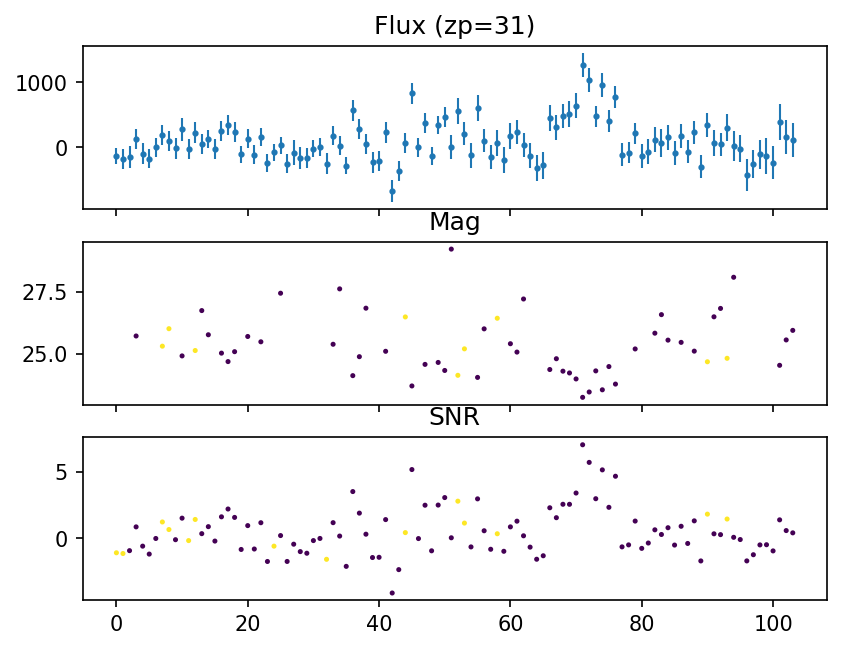

In [173]:
c = read("/epyc/projects/salad/search/new/DEEP/20190403/A0c/detector_1/snr_3.0/regular/tno/filtered_summary.pkl")
for k in c:
    fig = plot_summary_coadds(c[k].summary)
#     fig.suptitle(k)
    fig.tight_layout()
    plt.show()
    fig = plot_coadd_masks(c[k].summary)
    fig.suptitle(k)
    fig.tight_layout()
    plt.show()
    
for k in [216, 134, 279]:
    fig = plot_summary_coadds(c[k].summary)
    #     fig.suptitle(k)
    fig.tight_layout()
    plt.show()

    plot_summary_light_curve(c[k].summary)
    plt.show()

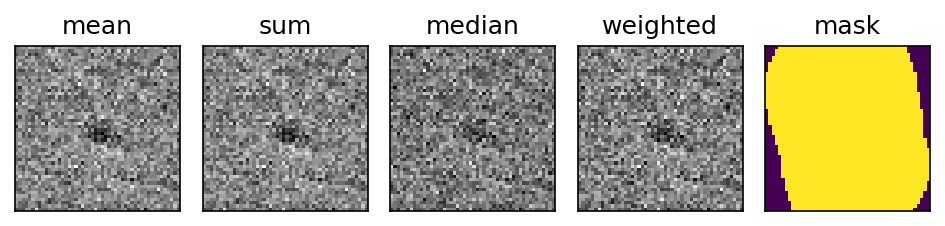

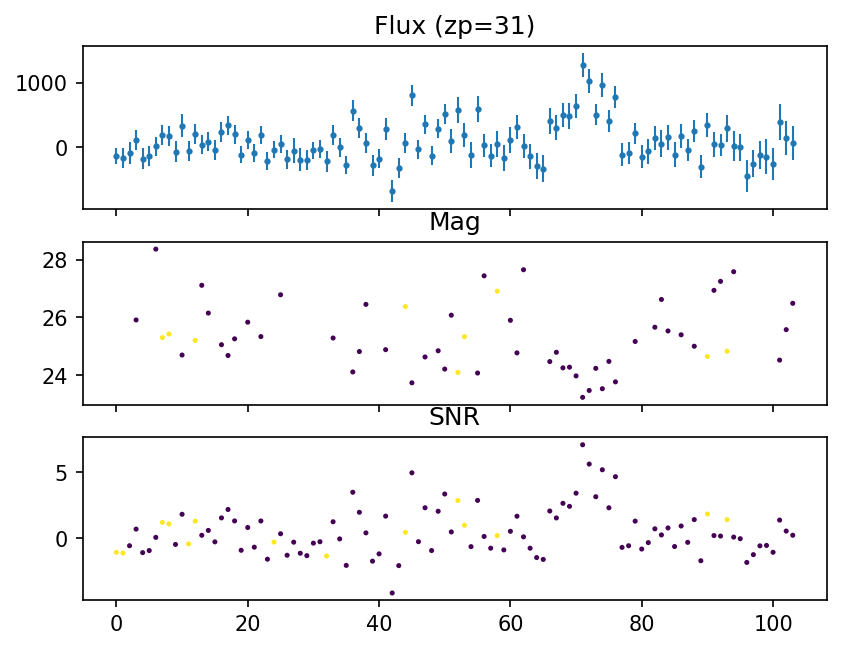

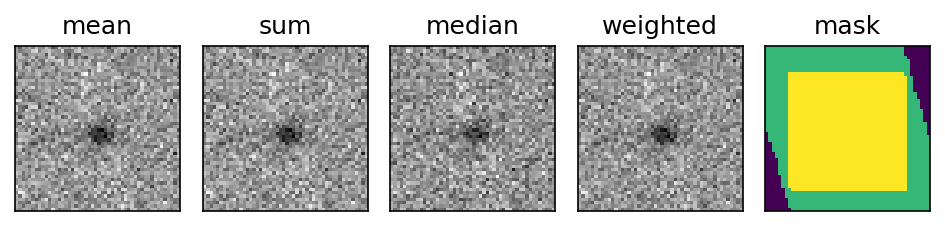

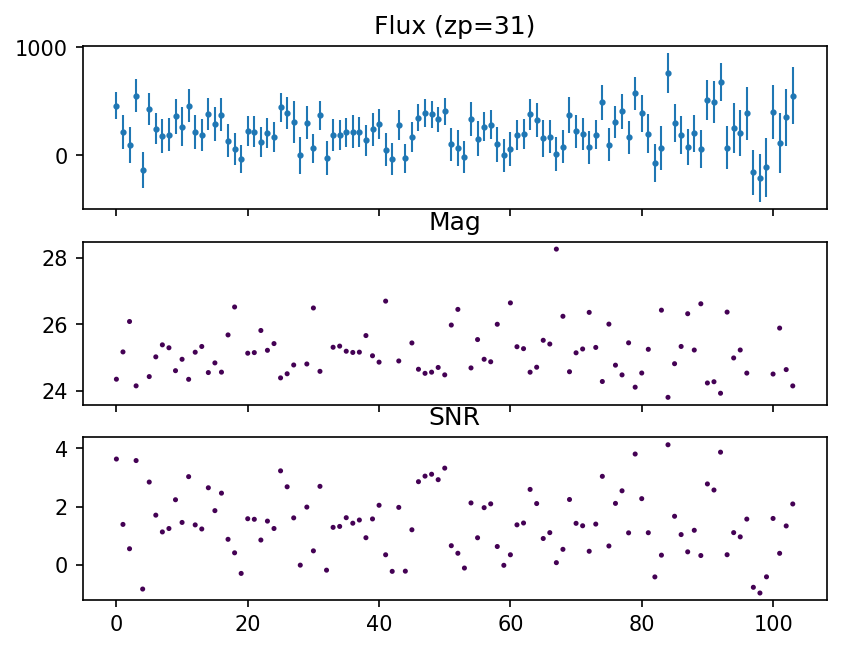

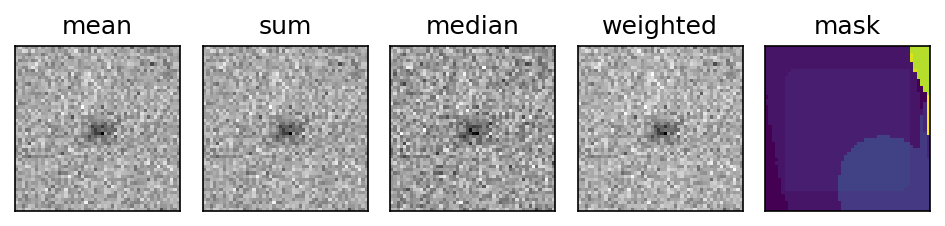

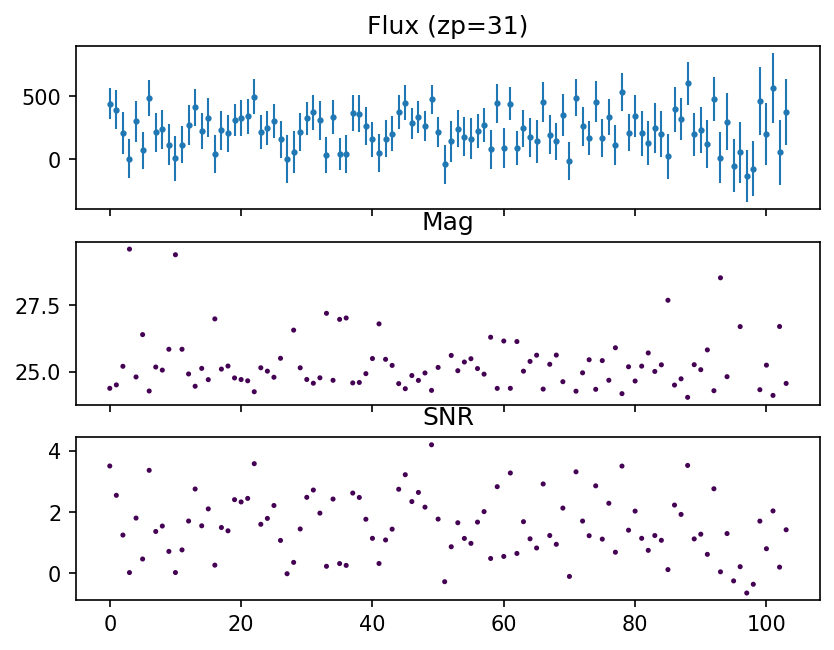

In [168]:
catalog = read("/epyc/projects/salad/search/single_search/DEEP/20190403/A0c/detector_1/snr_5.0/regular/catalog.pkl")
# fakes = read("/epyc/projects/salad/search/single_search/fakes.pkl")


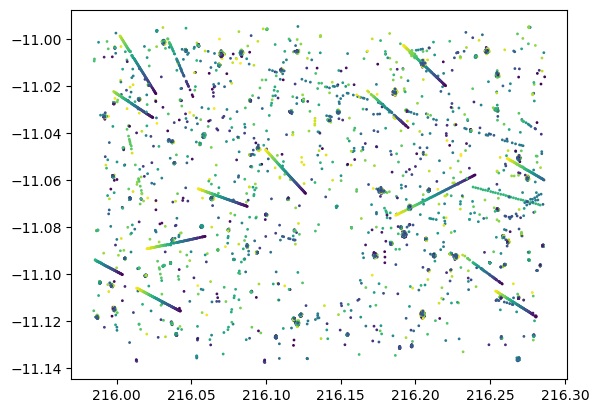

In [169]:
X = catalog.X()
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=X[:, 2],
    s=1,
)
plt.show()

In [44]:
d[0][k].summary['mask_plane_dict']

[{'BAD': 0,
  'CLIPPED': 9,
  'CR': 3,
  'CROSSTALK': 10,
  'DETECTED': 5,
  'DETECTED_NEGATIVE': 6,
  'EDGE': 4,
  'FAKE': 11,
  'INEXACT_PSF': 12,
  'INJECTED': 13,
  'INJECTED_TEMPLATE': 14,
  'INTRP': 2,
  'NOT_DEBLENDED': 15,
  'NO_DATA': 8,
  'REJECTED': 16,
  'SAT': 1,
  'SENSOR_EDGE': 17,
  'STREAK': 18,
  'SUSPECT': 7,
  'UNMASKEDNAN': 19},
 {'BAD': 0,
  'CLIPPED': 9,
  'CR': 3,
  'CROSSTALK': 10,
  'DETECTED': 5,
  'DETECTED_NEGATIVE': 6,
  'EDGE': 4,
  'FAKE': 11,
  'INEXACT_PSF': 12,
  'INJECTED': 13,
  'INJECTED_TEMPLATE': 14,
  'INTRP': 2,
  'NOT_DEBLENDED': 15,
  'NO_DATA': 8,
  'REJECTED': 16,
  'SAT': 1,
  'SENSOR_EDGE': 17,
  'STREAK': 18,
  'SUSPECT': 7,
  'UNMASKEDNAN': 19},
 {'BAD': 0,
  'CLIPPED': 9,
  'CR': 3,
  'CROSSTALK': 10,
  'DETECTED': 5,
  'DETECTED_NEGATIVE': 6,
  'EDGE': 4,
  'FAKE': 11,
  'INEXACT_PSF': 12,
  'INJECTED': 13,
  'INJECTED_TEMPLATE': 14,
  'INTRP': 2,
  'NOT_DEBLENDED': 15,
  'NO_DATA': 8,
  'REJECTED': 16,
  'SAT': 1,
  'SENSOR_EDGE': 17

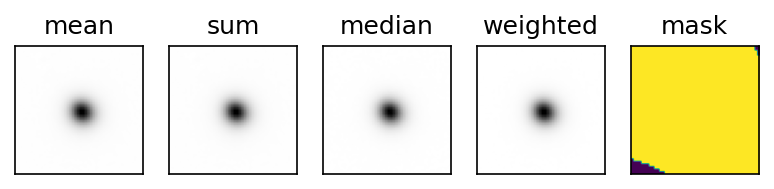

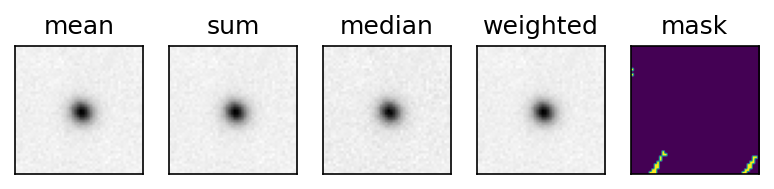

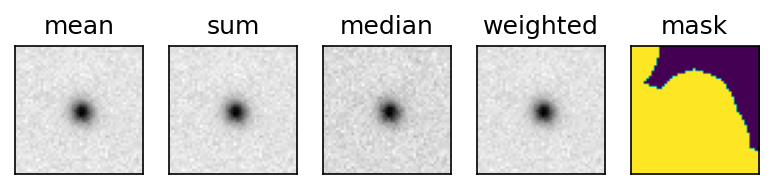

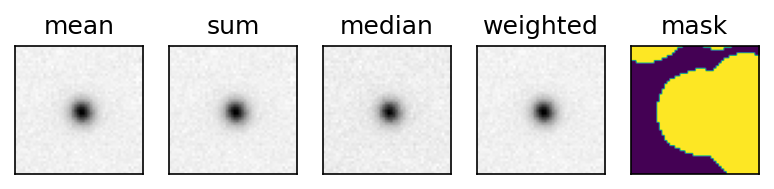

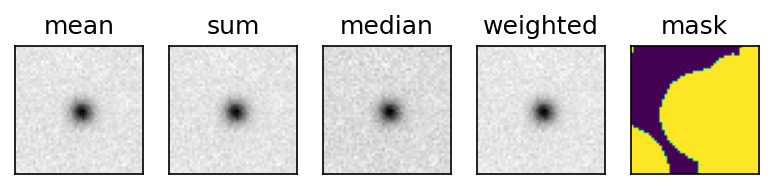

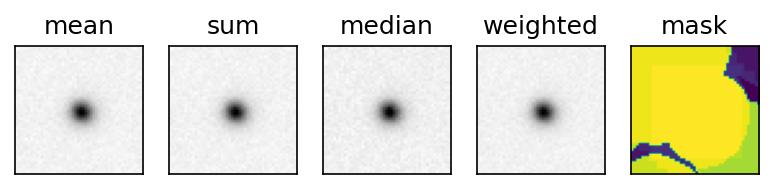

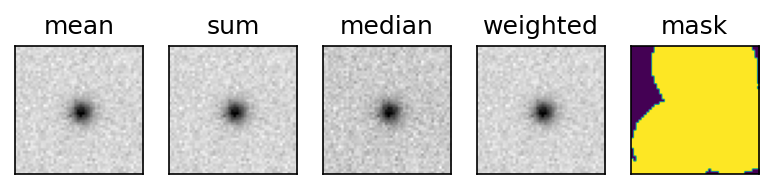

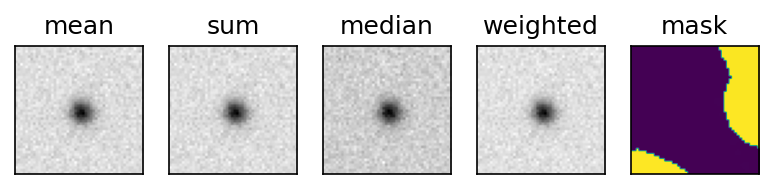

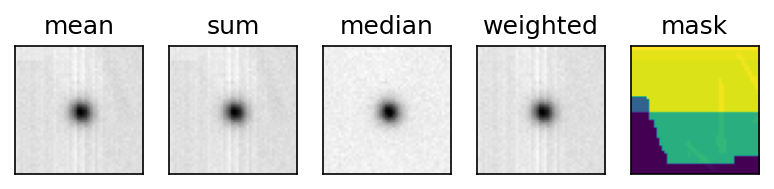

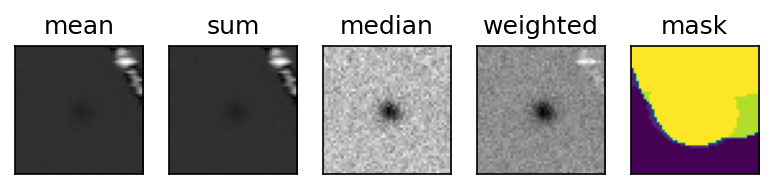

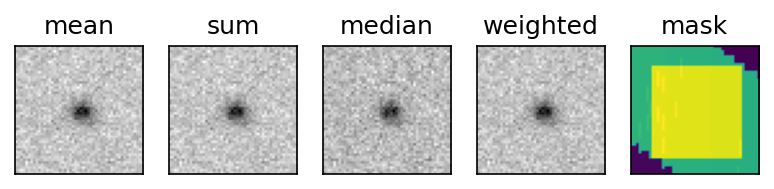

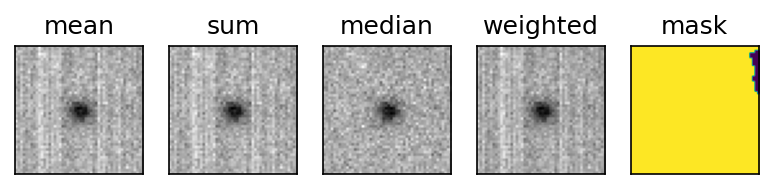

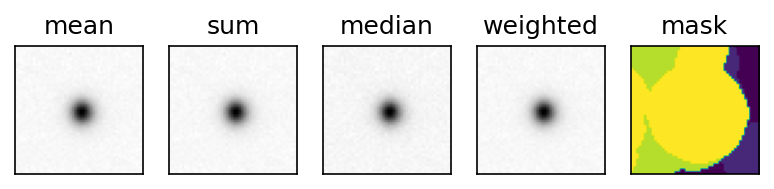

In [43]:
for k in d[0]:
    plot_summary_coadds(d[0][k].summary)